In [1]:
import sys
from pathlib import Path


# Get the project root directory
root_dir = Path().resolve()
if root_dir.name == 'your_project':
    sys.path.append(str(root_dir))
else:
    # If notebook is in a subdirectory
    parent_dir = root_dir.parent
    sys.path.append(str(parent_dir))



import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from modules.data.raw_data_handler import RawDataHandler
import datetime
import json

log_messages = []

def log(msg):
    """
    logs the message to the console
    AND stores it in the log_messages list for later use in the response.
    """
    print(msg)
    log_messages.append(msg)


In [2]:
dataset_dir = os.path.join( "storage", "merged_data.csv")

# Define the path to your CSV file (adjust the path as needed)
csv_file_path = dataset_dir

# Read the CSV file into a DataFrame named cleaned_data
cleaned_data = pd.read_csv(csv_file_path)

# Verify that the target column "fraud_label" exists
if "fraud_label" not in cleaned_data.columns:
    raise ValueError("The CSV file does not contain the required 'fraud_label' column.")

# Optionally, separate features and target:
X = cleaned_data.drop("fraud_label", axis=1)
y = cleaned_data["fraud_label"]

log("Dataset loaded successfully!")
log("Total records:")
log(cleaned_data.shape[0])
log("Total features:")
log(X.shape[1])

# log the remaining columns after dropping
log("Remaining columns in the dataset:")
log(list(cleaned_data.columns))

Dataset loaded successfully!
Total records:
1081015
Total features:
30
Remaining columns in the dataset:
['trans_num', 'index_x', 'trans_date_trans_time', 'cc_num', 'unix_time', 'merchant', 'category', 'amt', 'merch_lat', 'merch_long', 'fraud_label', 'index_y', 'first', 'last', 'sex', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'day_of_week', 'hour', 'minute', 'second', 'day_date', 'month_date', 'year_date']


In [3]:

columns_to_drop = [
   'trans_num', 'index_x', 'trans_date_trans_time', 'merch_lat', 'merch_long', 'index_y', 'first', 'last', 'sex', 'street', 'city', 'lat', 'long', 'dob', 'year_date']
# Drop the columns
cleaned_data = cleaned_data.drop(columns=columns_to_drop)

# Verify the columns were dropped
print(cleaned_data.columns)

Index(['cc_num', 'unix_time', 'merchant', 'category', 'amt', 'fraud_label',
       'state', 'zip', 'city_pop', 'job', 'day_of_week', 'hour', 'minute',
       'second', 'day_date', 'month_date'],
      dtype='object')


In [4]:
# Get a summary of your data
print(cleaned_data.info())

# Check the first few rows to see potential missing value patterns
print(cleaned_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081015 entries, 0 to 1081014
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   cc_num       1081015 non-null  int64  
 1   unix_time    1081015 non-null  float64
 2   merchant     1081015 non-null  object 
 3   category     1081015 non-null  object 
 4   amt          1081015 non-null  float64
 5   fraud_label  1081015 non-null  float64
 6   state        1081015 non-null  object 
 7   zip          1081015 non-null  float64
 8   city_pop     1081015 non-null  float64
 9   job          1081015 non-null  object 
 10  day_of_week  1081015 non-null  object 
 11  hour         1081015 non-null  int64  
 12  minute       1081015 non-null  int64  
 13  second       1081015 non-null  int64  
 14  day_date     1081015 non-null  int64  
 15  month_date   1081015 non-null  object 
dtypes: float64(5), int64(5), object(6)
memory usage: 132.0+ MB
None
             cc_num     un

In [5]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['merchant', 'category', 'state', 'job', 'day_of_week', 'month_date']

# Create a dictionary to store the encoders
label_encoders = {}

# Create a copy of the dataframe to avoid modifying the original
encoded_data = cleaned_data.copy()

# Apply label encoding to each column
for column in columns_to_encode:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])
    
    # Store the encoder for future reference (optional)
    label_encoders[column] = le
    
    # Print mapping information (optional)
    print(f"Encoded {column}: {len(le.classes_)} unique values")

# Verify the encoding worked
print("\nSample of encoded data:")
print(encoded_data[columns_to_encode].head())

Encoded merchant: 693 unique values
Encoded category: 28 unique values
Encoded state: 50 unique values
Encoded job: 563 unique values
Encoded day_of_week: 7 unique values
Encoded month_date: 12 unique values

Sample of encoded data:
   merchant  category  state  job  day_of_week  month_date
0       684        10      8  362            3           2
1       472        18     21  253            2           4
2       686         1     37  473            1           2
3       395         4      2   58            0           1
4       574         0     23  526            2           7


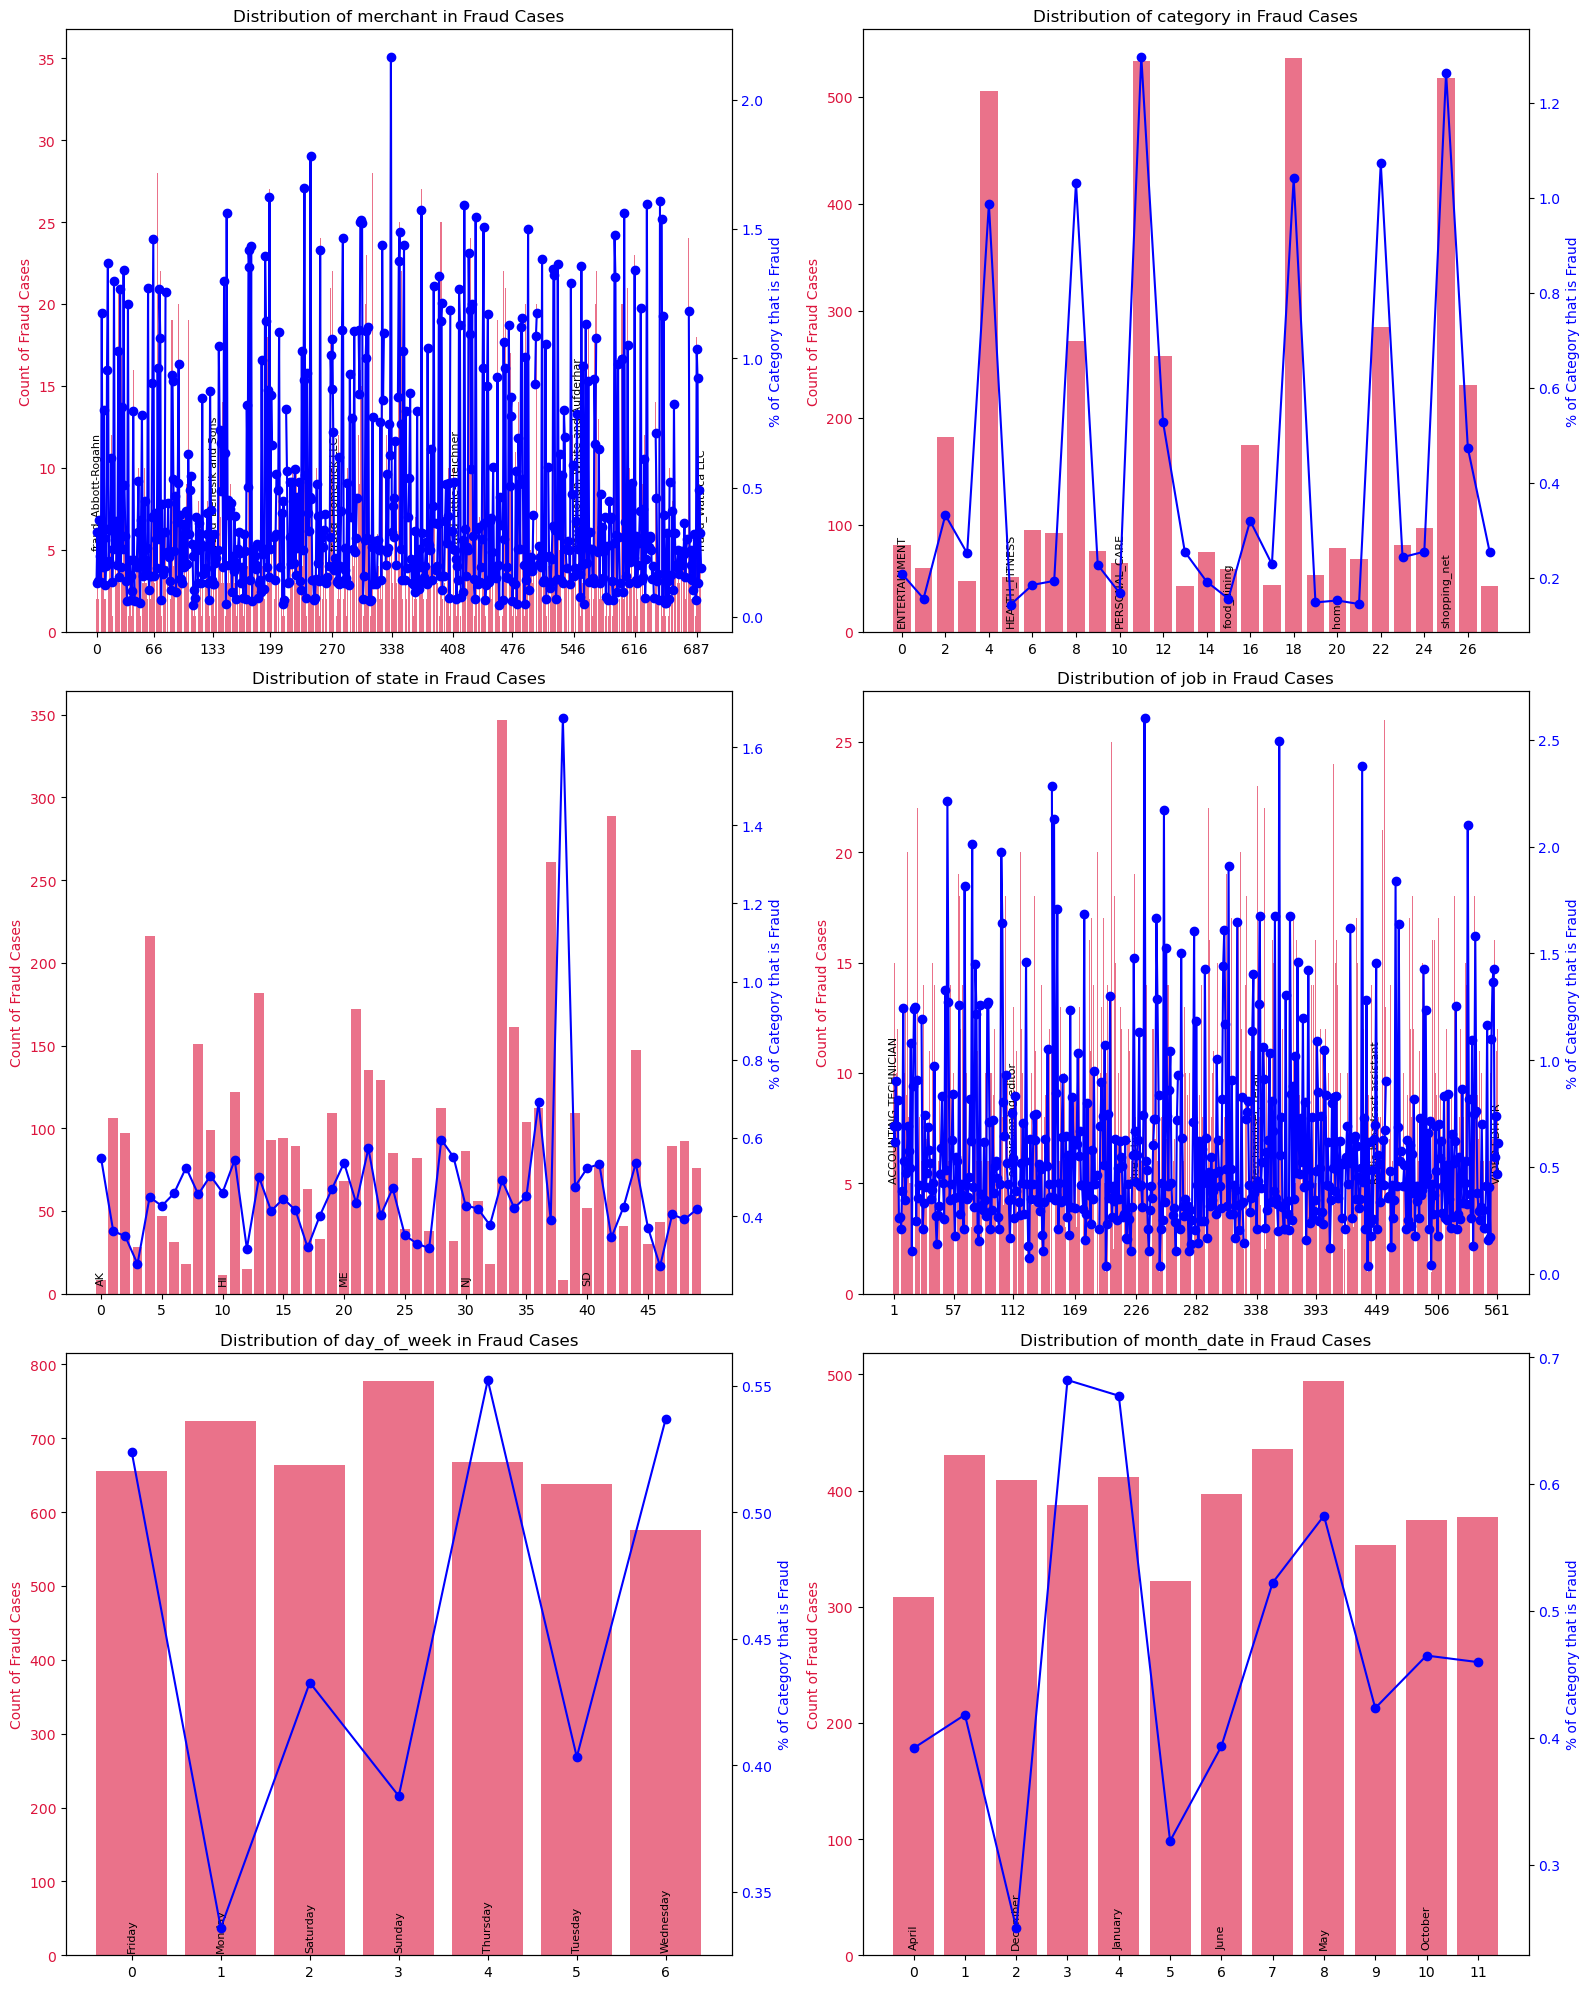

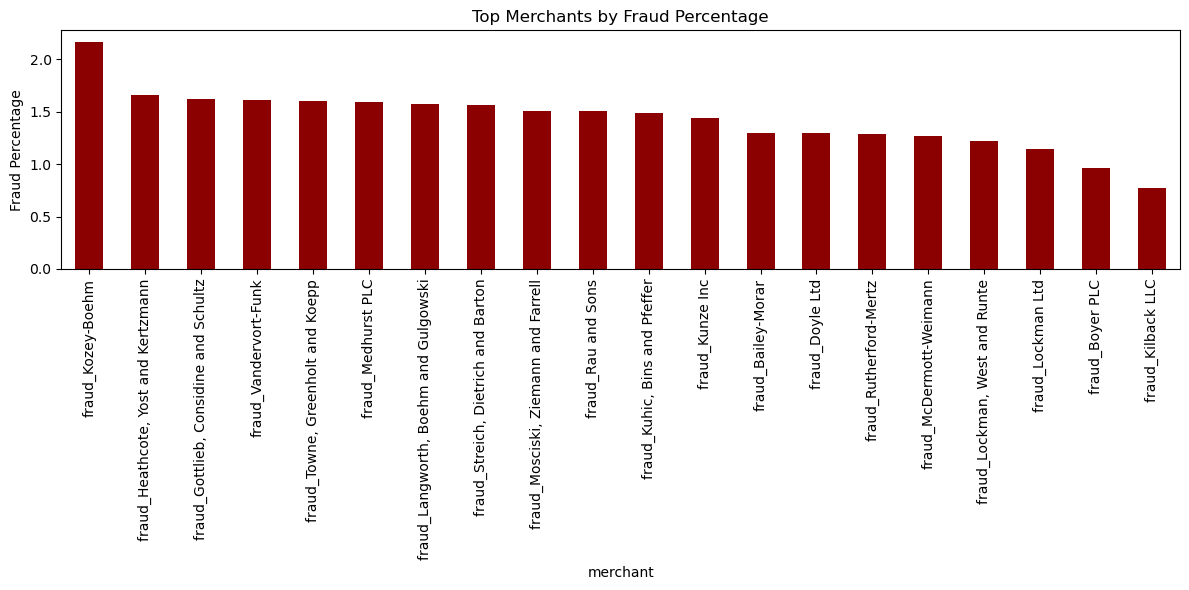

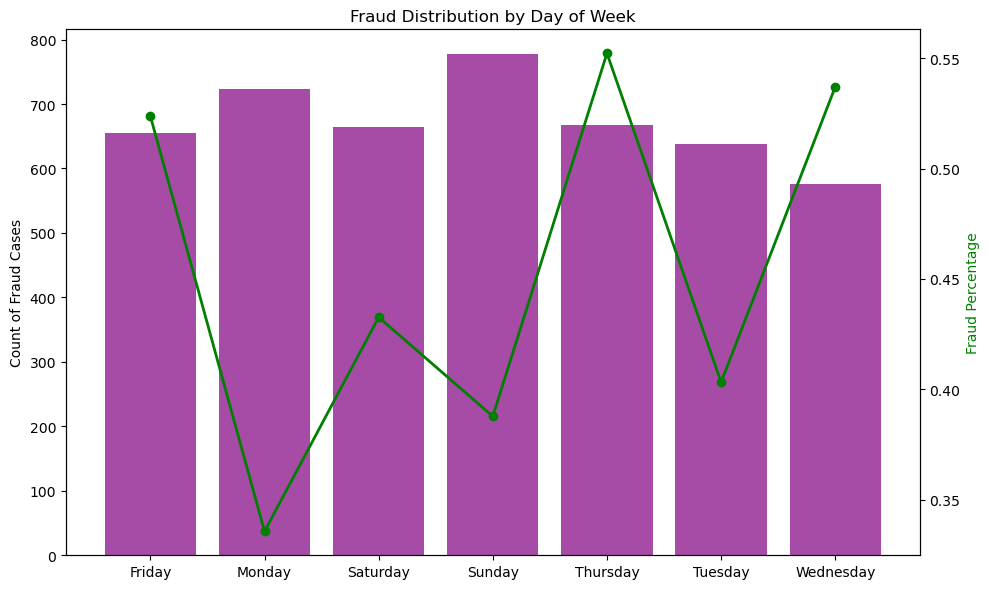

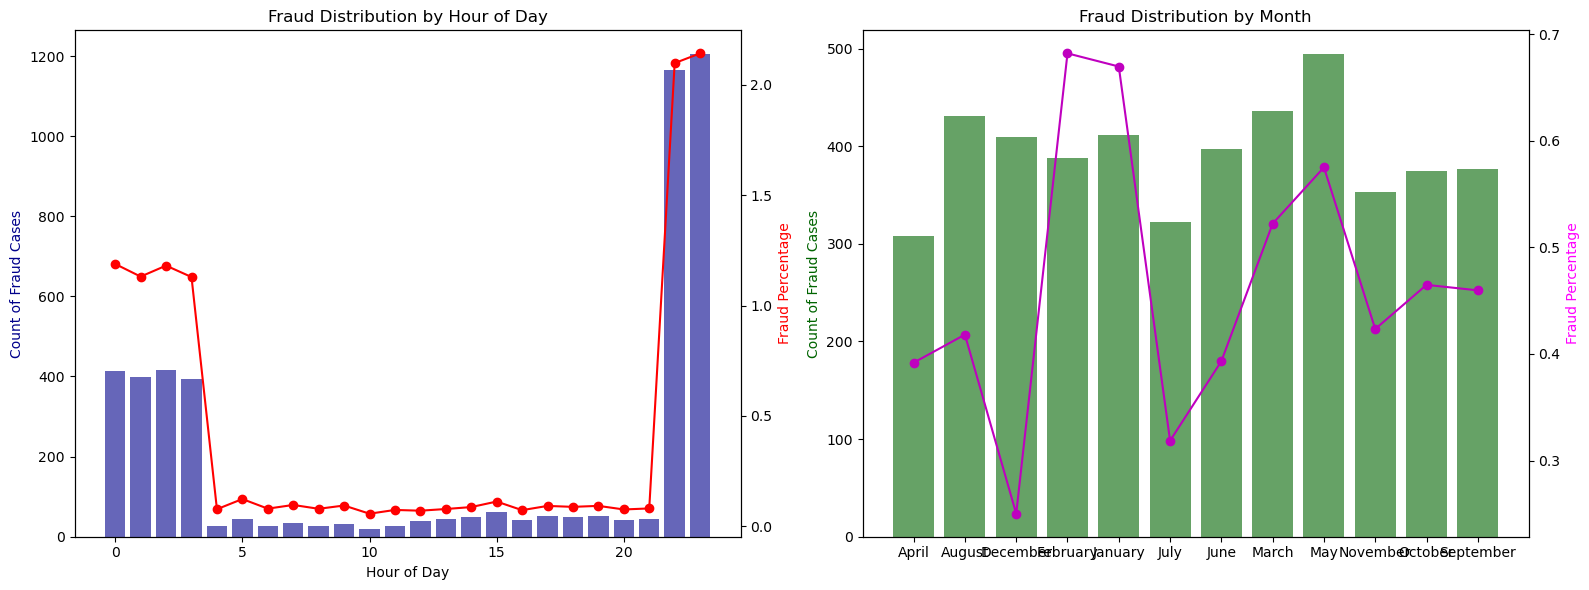

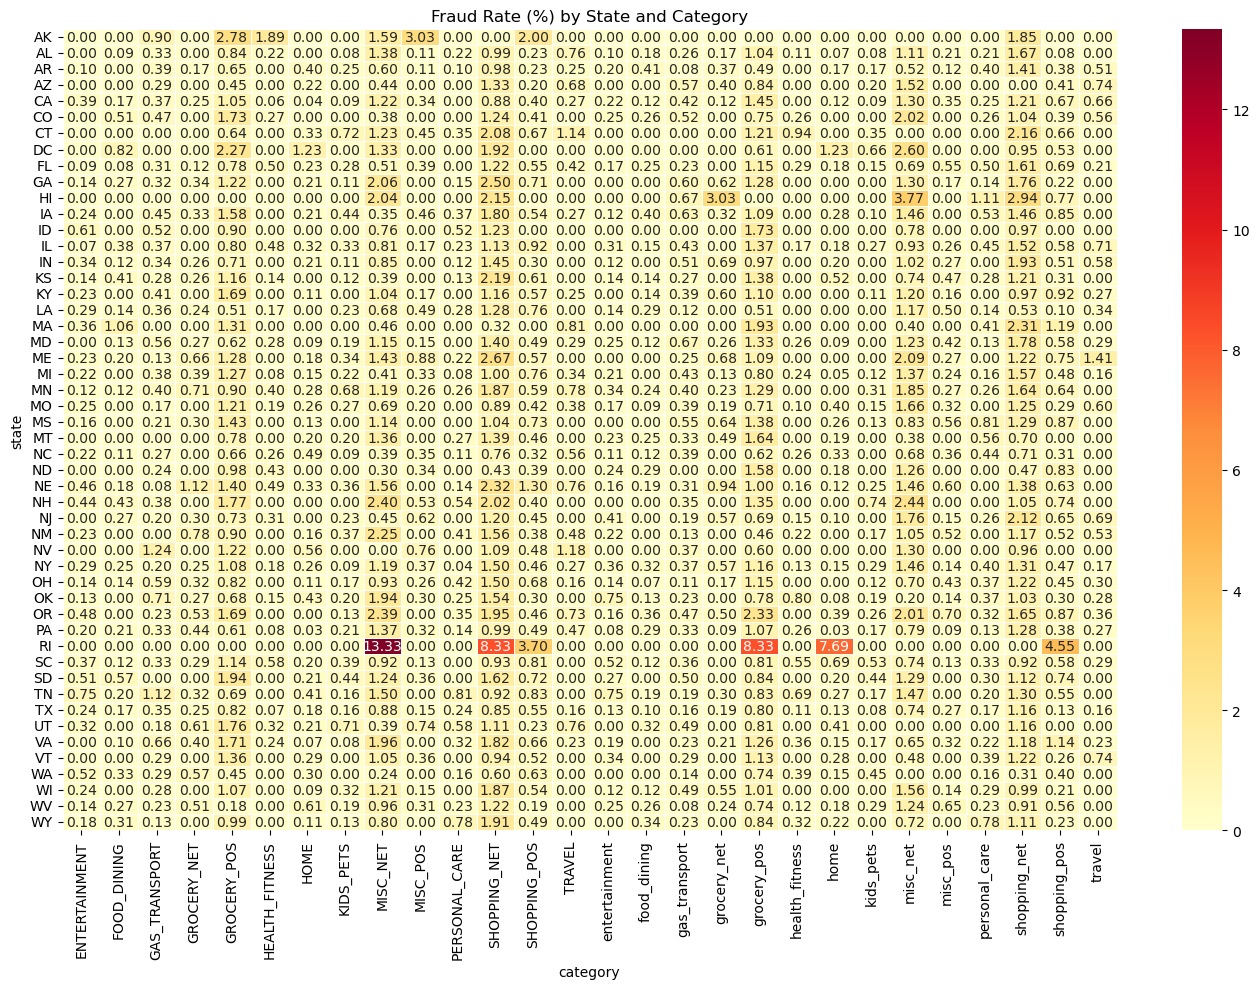

Running analysis on 5 numerical features...


C:\Users\Putna\AppData\Local\Temp\ipykernel_27460\1399388472.py:252: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non-Fraud', 'Fraud'])


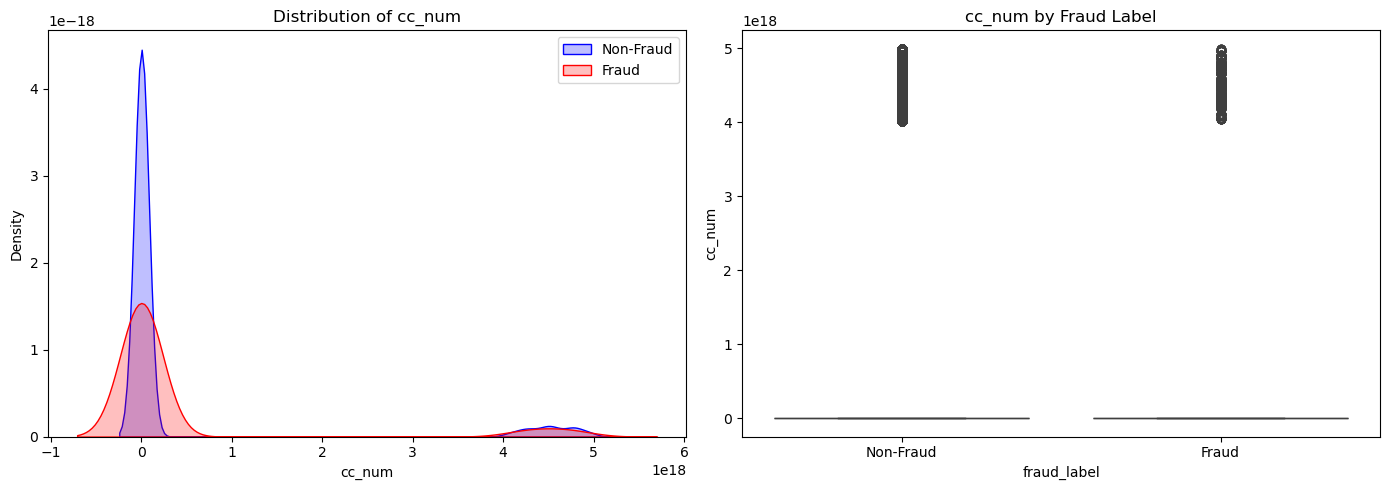

C:\Users\Putna\AppData\Local\Temp\ipykernel_27460\1399388472.py:252: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non-Fraud', 'Fraud'])


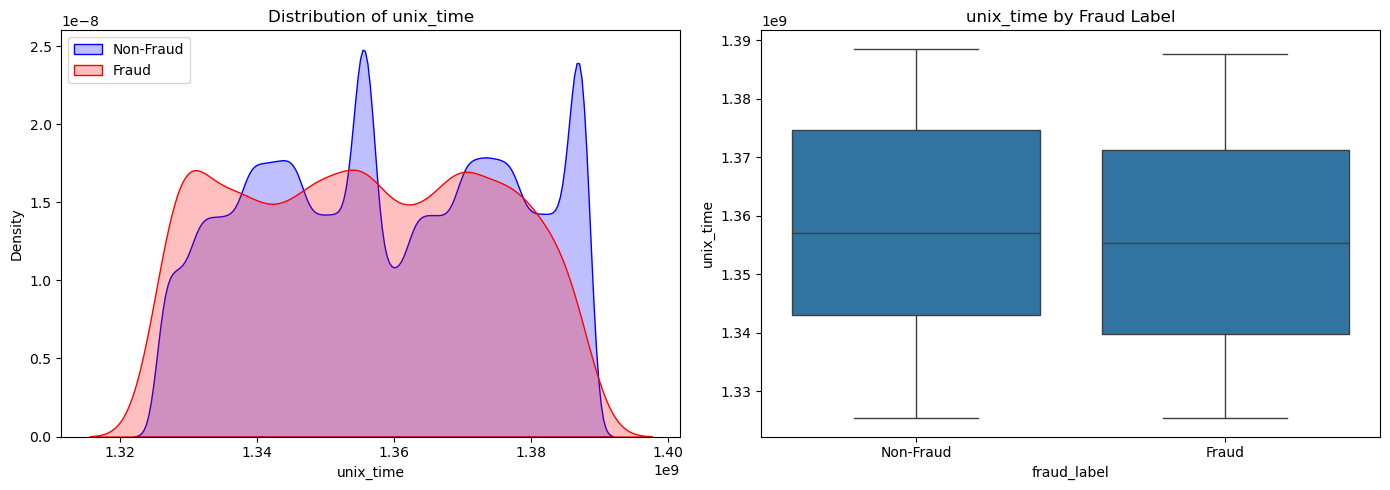

C:\Users\Putna\AppData\Local\Temp\ipykernel_27460\1399388472.py:252: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non-Fraud', 'Fraud'])


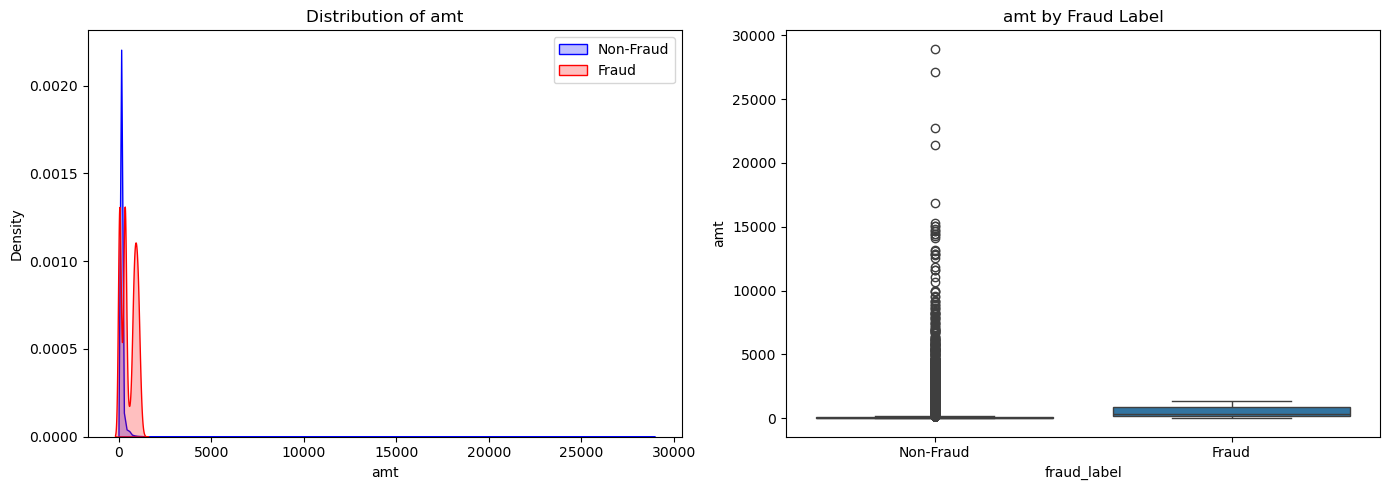

C:\Users\Putna\AppData\Local\Temp\ipykernel_27460\1399388472.py:252: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non-Fraud', 'Fraud'])


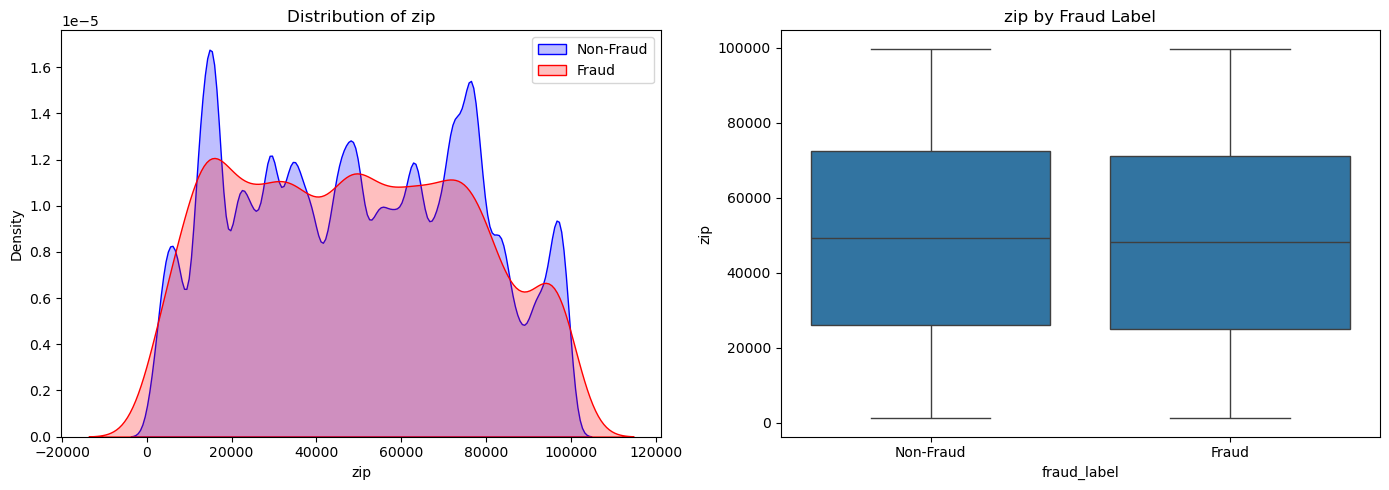

C:\Users\Putna\AppData\Local\Temp\ipykernel_27460\1399388472.py:252: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non-Fraud', 'Fraud'])


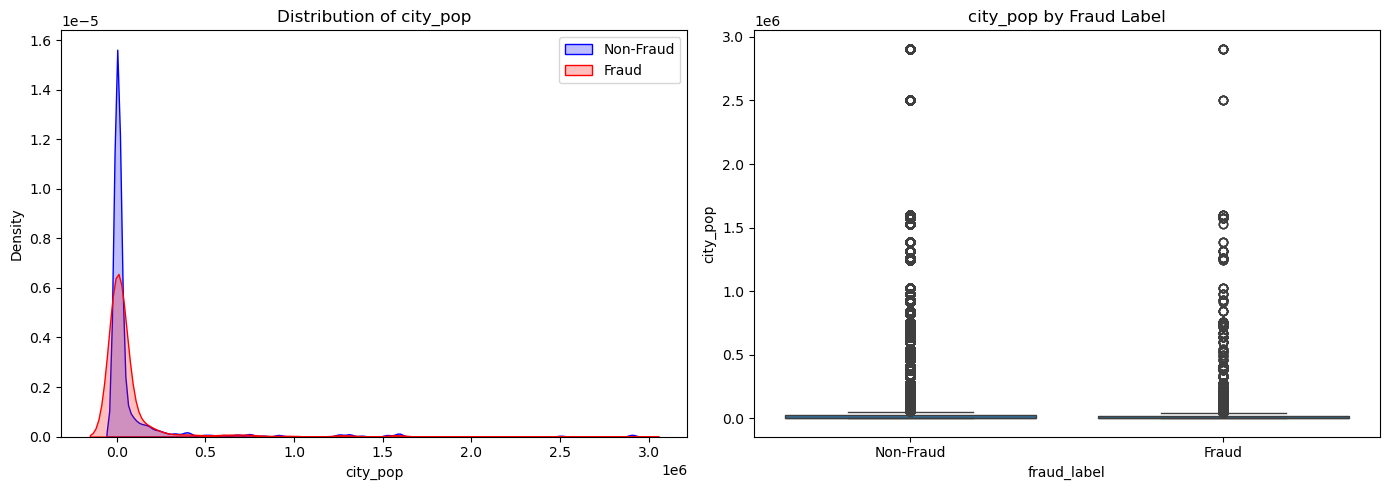

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have already created encoded_data with 'fraud_label' column
# If 'fraud_label' was dropped earlier, make sure you have it in your dataframe

# Filter for fraud cases
fraud_data = encoded_data[encoded_data['fraud_label'] == 1]
non_fraud_data = encoded_data[encoded_data['fraud_label'] == 0]

# Set up the plots
plt.figure(figsize=(16, 20))
columns_to_analyze = ['merchant', 'category', 'state', 'job', 'day_of_week', 'month_date']

# Plot distribution for each column
for i, column in enumerate(columns_to_analyze):
    plt.subplot(3, 2, i+1)
    
    # For categorical columns (the encoded ones)
    if column in columns_to_encode:
        # Count frequency of each category in fraud cases
        value_counts = fraud_data[column].value_counts().sort_index()
        
        # Get total counts for calculating percentages
        total_counts = encoded_data[column].value_counts().sort_index()
        fraud_percentage = (value_counts / total_counts) * 100
        
        # Plot both the raw count and the percentage
        ax1 = plt.gca()
        bars = ax1.bar(value_counts.index, value_counts.values, alpha=0.6, color='crimson')
        ax1.set_ylabel('Count of Fraud Cases', color='crimson')
        ax1.tick_params(axis='y', labelcolor='crimson')
        
        # Add percentage axis
        ax2 = ax1.twinx()
        line = ax2.plot(fraud_percentage.index, fraud_percentage.values, 'b-', marker='o')
        ax2.set_ylabel('% of Category that is Fraud', color='blue')
        ax2.tick_params(axis='y', labelcolor='blue')
        
        # If we have too many categories, limit x-axis labels
        if len(value_counts) > 10:
            plt.xticks(rotation=90)
            
            # Only show some of the labels to avoid overcrowding
            step = max(1, len(value_counts) // 10)
            plt.xticks(value_counts.index[::step])
        
        # Try to map back to original labels if available
        if column in label_encoders:
            # Create a mapping dictionary
            label_map = {i: label for i, label in enumerate(label_encoders[column].classes_)}
            
            # Add some labels for reference in the plot
            for j, bar in enumerate(bars):
                if j % max(1, len(bars) // 5) == 0:  # Add labels for every 5th bar
                    ax1.text(bar.get_x() + bar.get_width()/2, 5,
                            f"{label_map.get(j, j)}", 
                            ha='center', va='bottom', rotation=90, fontsize=8)
    
    # For numerical columns, use histograms
    else:
        sns.histplot(data=fraud_data, x=column, color='crimson', kde=True, alpha=0.6)
        
    plt.title(f'Distribution of {column} in Fraud Cases')
    plt.tight_layout()

# Add a plot for top fraud merchants if merchant is in the dataset
if 'merchant' in columns_to_analyze:
    plt.figure(figsize=(12, 6))
    top_fraud_merchants = fraud_data['merchant'].value_counts().head(20)
    
    # Calculate fraud percentage for these merchants
    merchant_counts = encoded_data['merchant'].value_counts()
    top_fraud_merchant_indexes = top_fraud_merchants.index
    top_merchant_total_counts = merchant_counts[top_fraud_merchant_indexes]
    fraud_percentage = (top_fraud_merchants / top_merchant_total_counts) * 100
    
    # Sort by percentage
    fraud_percentage = fraud_percentage.sort_values(ascending=False)
    
    # Create the bar plot
    ax = fraud_percentage.plot(kind='bar', color='darkred')
    
    # Try to map back to original merchant names
    if 'merchant' in label_encoders:
        label_map = {i: label for i, label in enumerate(label_encoders['merchant'].classes_)}
        labels = [label_map.get(idx, idx) for idx in fraud_percentage.index]
        ax.set_xticklabels(labels, rotation=90)
    
    plt.title('Top Merchants by Fraud Percentage')
    plt.ylabel('Fraud Percentage')
    plt.tight_layout()

# Plot fraud by day of week if available
if 'day_of_week' in columns_to_analyze:
    plt.figure(figsize=(10, 6))
    
    # Get the day of week distribution
    dow_fraud = fraud_data['day_of_week'].value_counts().reindex(range(7), fill_value=0)
    
    # Get total counts and calculate percentage
    dow_total = encoded_data['day_of_week'].value_counts().reindex(range(7), fill_value=0)
    dow_percentage = (dow_fraud / dow_total) * 100
    
    # Create a bar plot
    ax = plt.subplot(111)
    bars = ax.bar(dow_fraud.index, dow_fraud.values, alpha=0.7, color='purple')
    
    # Add percentage line
    ax2 = ax.twinx()
    line = ax2.plot(dow_percentage.index, dow_percentage.values, 'g-', marker='o', linewidth=2)
    ax2.set_ylabel('Fraud Percentage', color='green')
    
    # Map numeric days to actual day names
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if 'day_of_week' in label_encoders:
        # Get the mapping
        label_map = {i: label for i, label in enumerate(label_encoders['day_of_week'].classes_)}
        # Try to infer the correct order
        if set(label_map.values()) == set(days):
            # If days are stored as strings, map correctly
            day_order = {day: i for i, day in enumerate(days)}
            ordered_labels = sorted(label_map.items(), key=lambda x: day_order.get(x[1], 0))
            plt.xticks([x[0] for x in ordered_labels], [x[1] for x in ordered_labels])
    
    plt.title('Fraud Distribution by Day of Week')
    plt.xlabel('Day of Week')
    ax.set_ylabel('Count of Fraud Cases')
    plt.tight_layout()

# Plot time-based patterns if available
if all(col in encoded_data.columns for col in ['hour', 'month_date']):
    plt.figure(figsize=(16, 6))
    
    # Hour distribution
    plt.subplot(121)
    if 'hour' in encoded_data.columns:
        hour_fraud = fraud_data['hour'].value_counts().sort_index()
        total_hour = encoded_data['hour'].value_counts().sort_index()
        hour_percentage = (hour_fraud / total_hour) * 100
        
        ax1 = plt.gca()
        bars = ax1.bar(hour_fraud.index, hour_fraud.values, alpha=0.6, color='darkblue')
        ax1.set_xlabel('Hour of Day')
        ax1.set_ylabel('Count of Fraud Cases', color='darkblue')
        
        ax2 = ax1.twinx()
        line = ax2.plot(hour_percentage.index, hour_percentage.values, 'r-', marker='o')
        ax2.set_ylabel('Fraud Percentage', color='red')
        
        plt.title('Fraud Distribution by Hour of Day')
    
    # Month distribution
    plt.subplot(122)
    if 'month_date' in encoded_data.columns:
        month_fraud = fraud_data['month_date'].value_counts().sort_index()
        total_month = encoded_data['month_date'].value_counts().sort_index()
        month_percentage = (month_fraud / total_month) * 100
        
        ax1 = plt.gca()
        bars = ax1.bar(month_fraud.index, month_fraud.values, alpha=0.6, color='darkgreen')
        ax1.set_ylabel('Count of Fraud Cases', color='darkgreen')
        
        # Try to map to month names
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        if 'month_date' in label_encoders:
            label_map = {i: label for i, label in enumerate(label_encoders['month_date'].classes_)}
            plt.xticks(range(len(label_map)), [label_map.get(i, i) for i in range(len(label_map))])
        
        ax2 = ax1.twinx()
        line = ax2.plot(month_percentage.index, month_percentage.values, 'm-', marker='o')
        ax2.set_ylabel('Fraud Percentage', color='magenta')
        
        plt.title('Fraud Distribution by Month')
    
    plt.tight_layout()

# Add one more insightful visualization: Heatmap of fraud rate by state and category if available
if all(col in encoded_data.columns for col in ['state', 'category']):
    plt.figure(figsize=(14, 10))
    
    # Create a pivot table with fraud rates
    pivot_data = encoded_data.pivot_table(
        index='state', 
        columns='category',
        values='fraud_label',
        aggfunc='mean'  # This gives us the fraud rate
    ) * 100  # Convert to percentage
    
    # Create the heatmap
    ax = sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=.5)
    
    # Try to map indices and columns back to original labels
    if 'state' in label_encoders and 'category' in label_encoders:
        state_map = {i: label for i, label in enumerate(label_encoders['state'].classes_)}
        category_map = {i: label for i, label in enumerate(label_encoders['category'].classes_)}
        
        # Get current labels
        row_labels = [state_map.get(i, i) for i in pivot_data.index]
        col_labels = [category_map.get(i, i) for i in pivot_data.columns]
        
        ax.set_yticklabels(row_labels)
        ax.set_xticklabels(col_labels, rotation=90)
    
    plt.title('Fraud Rate (%) by State and Category')
    plt.tight_layout()

plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_bivariate_analysis(encoded_data, max_features=6):
    """
    Perform univariate and bivariate analysis on a label-encoded dataset.

    Parameters:
    - encoded_data: DataFrame containing features and a 'fraud_label' column.
    - max_features: Max number of features to plot.
    """
    if 'fraud_label' not in encoded_data.columns:
        raise ValueError("Dataset must contain a 'fraud_label' column.")

    # Split data
    fraud_data = encoded_data[encoded_data['fraud_label'] == 1]
    non_fraud_data = encoded_data[encoded_data['fraud_label'] == 0]

    # Infer numeric features (excluding the label)
    numeric_cols = encoded_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != 'fraud_label']
    numeric_cols = numeric_cols[:max_features]  # limit to avoid clutter

    print(f"Running analysis on {len(numeric_cols)} numerical features...")

    for col in numeric_cols:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # KDE Plot
        sns.kdeplot(non_fraud_data[col], ax=axes[0], label='Non-Fraud', fill=True, color='blue')
        sns.kdeplot(fraud_data[col], ax=axes[0], label='Fraud', fill=True, color='red')
        axes[0].set_title(f'Distribution of {col}')
        axes[0].legend()

        # Box Plot
        sns.boxplot(data=encoded_data, x='fraud_label', y=col, ax=axes[1])
        axes[1].set_xticklabels(['Non-Fraud', 'Fraud'])
        axes[1].set_title(f'{col} by Fraud Label')

        plt.tight_layout()
        plt.show()


univariate_bivariate_analysis(encoded_data, max_features=5)



In [7]:
from sklearn.model_selection import train_test_split

df = encoded_data

# Create a 5% stratified sample
# This preserves the same proportion of fraud/non-fraud cases as in the original data
sample_size = 1.0  # 10% of the data

# Split the data - the "test" set will be our 5% sample
_, sample_data = train_test_split(
    df,                   # Your original dataframe
    test_size=sample_size,
    random_state=42,      # For reproducibility
    stratify=df['fraud_label']  # Stratify based on fraud label
)

# Verify the sample size
print(f"Original dataset size: {len(df)}")
print(f"Sample dataset size: {len(sample_data)} ({len(sample_data)/len(df)*100:.2f}%)")

# Verify that the fraud distribution is maintained
original_fraud_rate = df['fraud_label'].mean() * 100
sample_fraud_rate = sample_data['fraud_label'].mean() * 100

print(f"Original fraud rate: {original_fraud_rate:.2f}%")
print(f"Sample fraud rate: {sample_fraud_rate:.2f}%")

# Use the sample_data dataframe for your feature engineering
encoded_data = sample_data

Original dataset size: 1081015
Sample dataset size: 540508 (50.00%)
Original fraud rate: 0.43%
Sample fraud rate: 0.43%



=== Top Merchants with Fraud ===
Top 5 merchant categories by fraud rate:
  337: 2.64% fraud rate (758 transactions)
  245: 2.07% fraud rate (579 transactions)
  647: 2.03% fraud rate (493 transactions)
  372: 2.00% fraud rate (900 transactions)
  421: 1.99% fraud rate (804 transactions)

=== Top Categories with Fraud ===
Top 6 category categories by fraud rate:
  11: 1.35% fraud rate (20593 transactions)
  25: 1.17% fraud rate (20545 transactions)
  22: 1.09% fraud rate (13288 transactions)
  4: 1.02% fraud rate (25747 transactions)
  8: 0.97% fraud rate (13240 transactions)
  18: 0.95% fraud rate (25812 transactions)

=== Top Jobs with Fraud ===
Top 10 job categories by fraud rate:
  74: 3.64% fraud rate (220 transactions)
  436: 2.89% fraud rate (277 transactions)
  359: 2.79% fraud rate (251 transactions)
  148: 2.76% fraud rate (254 transactions)
  234: 2.65% fraud rate (226 transactions)
  376: 2.61% fraud rate (230 transactions)
  355: 2.54% fraud rate (236 transactions)
  467:

C:\Users\Putna\AppData\Local\Temp\ipykernel_27460\3556579034.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amt_fraud_rates = df.groupby('amt_bin').agg({


Average transactions per hour (legitimate): 0.05 (std: 0.03)
Average transactions per day (legitimate): 1.13 (std: 0.56)

=== Creating Interaction Features ===


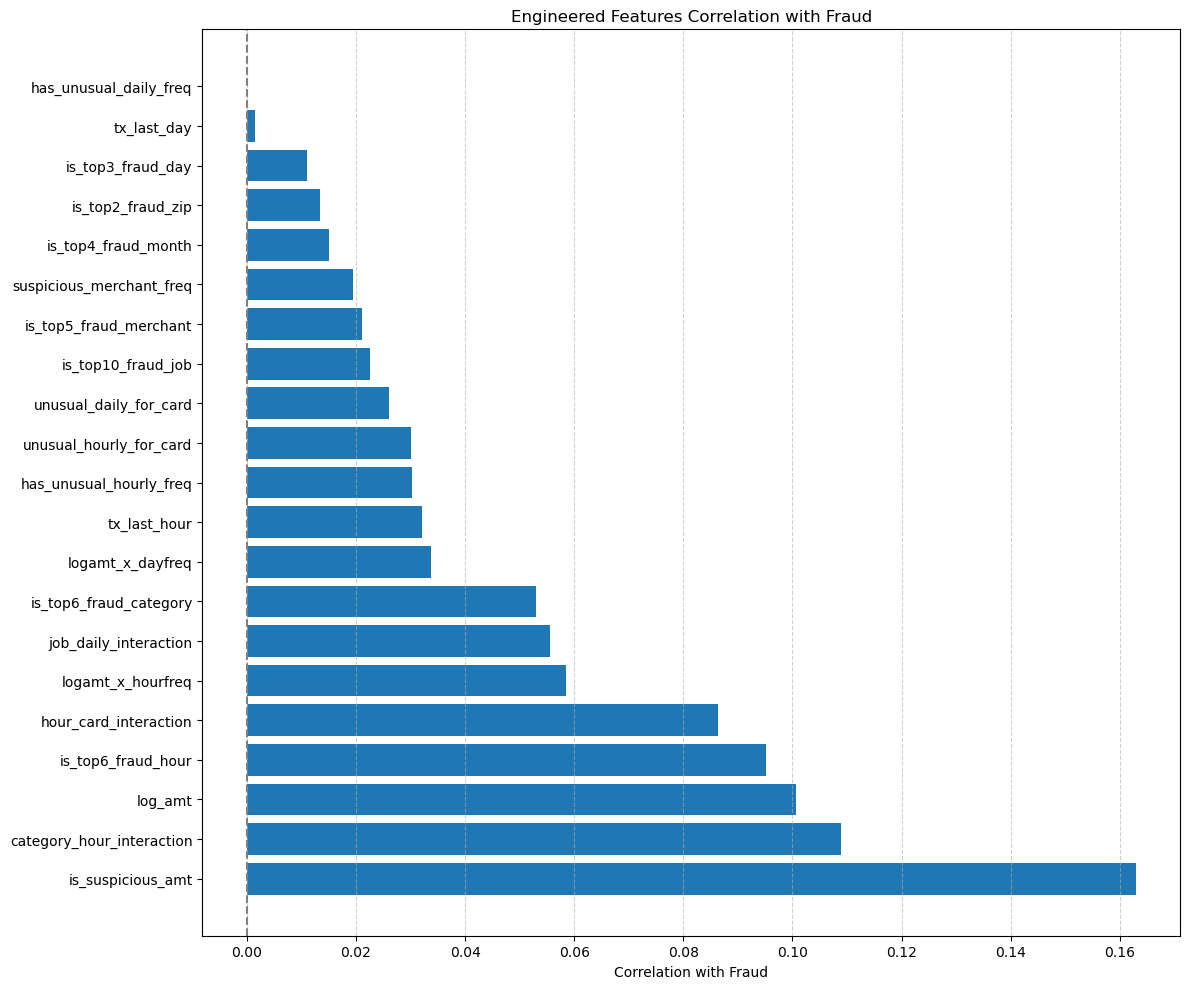


=== Engineered Features Summary ===
       is_top5_fraud_merchant  is_top6_fraud_category  is_top10_fraud_job  \
count           540508.000000           540508.000000       540508.000000   
mean                 0.006538                0.220580            0.004450   
std                  0.080595                0.414638            0.066556   
min                  0.000000                0.000000            0.000000   
25%                  0.000000                0.000000            0.000000   
50%                  0.000000                0.000000            0.000000   
75%                  0.000000                0.000000            0.000000   
max                  1.000000                1.000000            1.000000   

       is_top6_fraud_hour  is_top4_fraud_month  is_top3_fraud_day  \
count       540508.000000        540508.000000      540508.000000   
mean             0.233051             0.266638           0.327090   
std              0.422775             0.442202           0.469

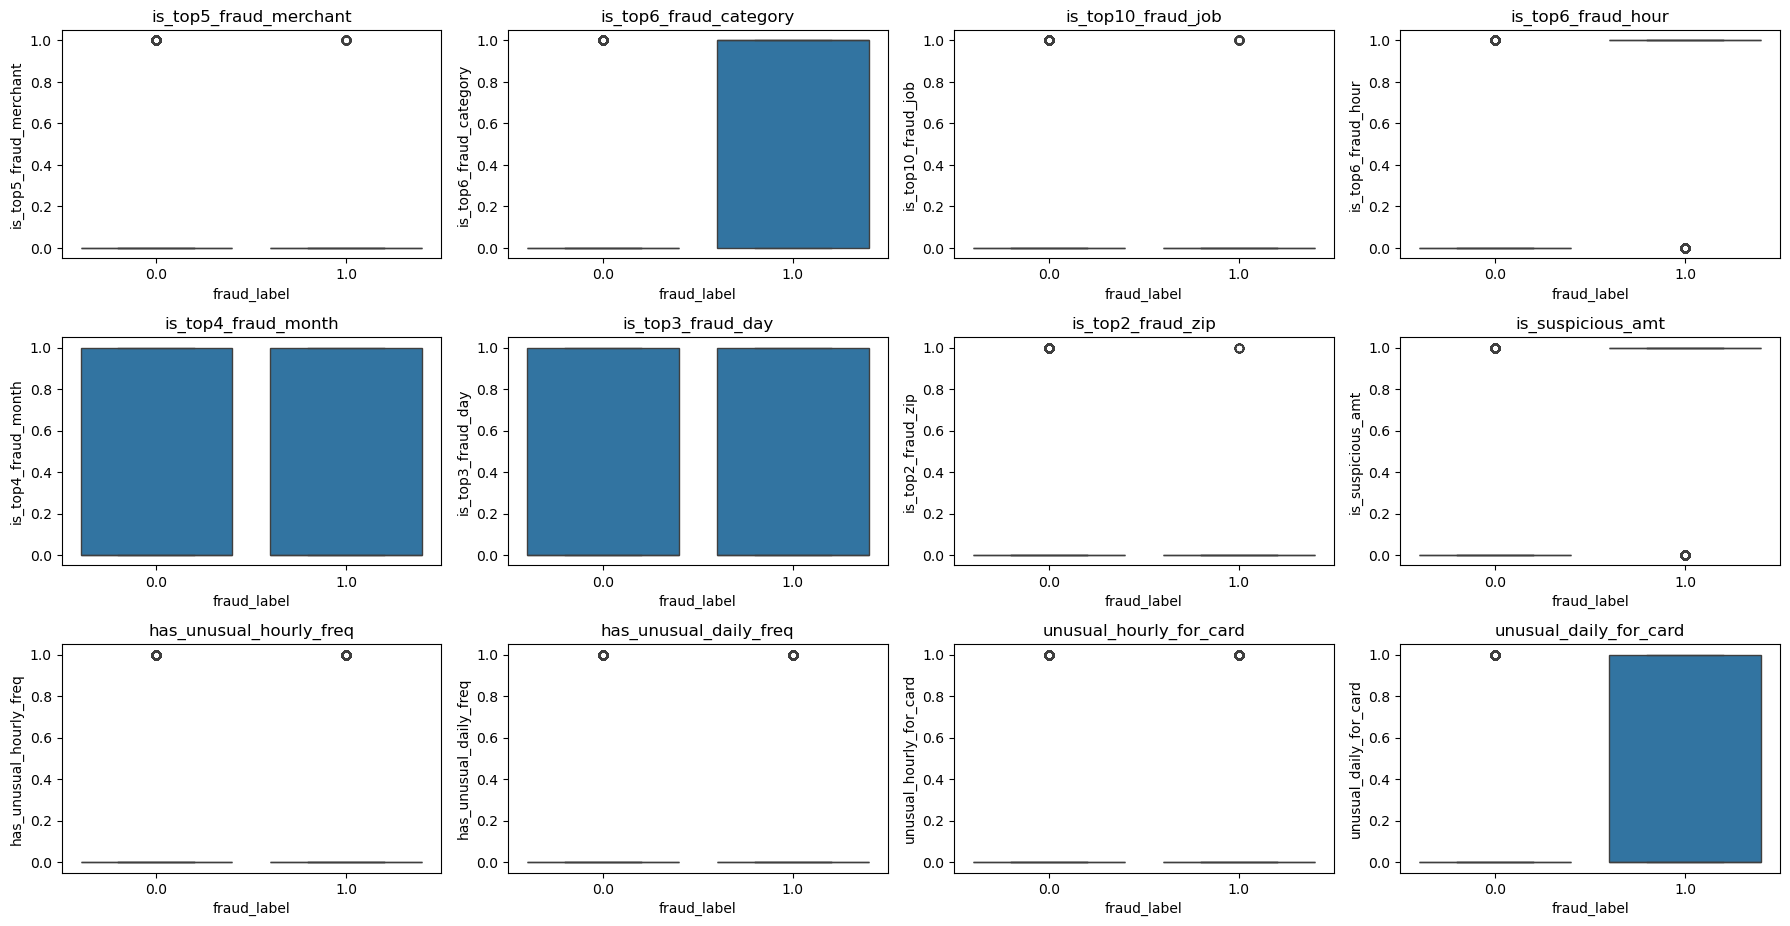


Final engineered dataset shape: (540508, 22)
Binary features created: 12


,is_top5_fraud_merchant,is_top6_fraud_category,is_top10_fraud_job,is_top6_fraud_hour,is_top4_fraud_month,is_top3_fraud_day,is_top2_fraud_zip,log_amt,is_suspicious_amt,tx_last_hour,...,has_unusual_daily_freq,unusual_hourly_for_card,unusual_daily_for_card,logamt_x_hourfreq,logamt_x_dayfreq,suspicious_merchant_freq,category_hour_interaction,job_daily_interaction,hour_card_interaction,fraud_label
632878,0,0,0,0,1,1,0,4.419804,0,0,...,0,0,0,0.000000,0.000000,0,0,0,0,0.0
921676,0,0,0,0,1,1,0,2.243896,0,0,...,0,0,0,0.000000,0.000000,0,0,0,0,0.0
303977,0,1,0,0,1,0,0,4.639282,0,0,...,0,0,0,0.000000,0.000000,0,0,0,0,0.0
533246,0,0,0,1,1,0,0,5.307128,1,0,...,0,0,0,0.000000,0.000000,0,0,0,0,0.0
24577,0,0,0,1,1,0,0,4.412556,0,1,...,0,1,0,4.412556,4.412556,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146237,0,0,0,1,0,0,0,2.702032,0,1,...,1,1,1,2.702032,13.510161,0,0,0,1,0.0
687697,0,0,0,0,0,1,0,4.575020,0,0,...,0,0,0,0.000000,9.150040,0,0,0,0,0.0
962019,0,1,0,0,0,1,0,1.719189,0,0,...,0,0,0,0.000000,1.719189,0,0,0,0,0.0
720688,0,0,0,0,0,1,0,4.574299,0,0,...,0,0,0,0.000000,9.148597,0,0,0,0,0.0


In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Assuming we have the encoded_data DataFrame with all columns mentioned earlier
# First, let's create a copy to work with
df = encoded_data.copy()

# Helper function to get top N categories with highest fraud rates
def get_top_fraud_categories(df, column, n=10, min_count=50):
    # Group by the column and calculate fraud rate and total count
    fraud_rates = df.groupby(column).agg({
        'fraud_label': ['mean', 'count']
    })
    
    # Flatten the multi-index columns
    fraud_rates.columns = ['fraud_rate', 'count']
    
    # Filter out categories with too few transactions
    fraud_rates = fraud_rates[fraud_rates['count'] >= min_count]
    
    # Sort by fraud rate in descending order and get top N
    top_categories = fraud_rates.sort_values('fraud_rate', ascending=False).head(n).index.tolist()
    
    print(f"Top {n} {column} categories by fraud rate:")
    for cat in top_categories:
        rate = fraud_rates.loc[cat, 'fraud_rate'] * 100
        count = fraud_rates.loc[cat, 'count']
        print(f"  {cat}: {rate:.2f}% fraud rate ({count} transactions)")
    
    return top_categories

# 1. Create binary features for top merchants with fraud
print("\n=== Top Merchants with Fraud ===")
top_fraud_merchants = get_top_fraud_categories(df, 'merchant', n=5, min_count=5)
df['is_top5_fraud_merchant'] = df['merchant'].isin(top_fraud_merchants).astype(int)

# 2. Create binary features for top categories with fraud
print("\n=== Top Categories with Fraud ===")
top_fraud_categories = get_top_fraud_categories(df, 'category', n=6, min_count=20)
df['is_top6_fraud_category'] = df['category'].isin(top_fraud_categories).astype(int)

# 3. Create binary features for top jobs with fraud
print("\n=== Top Jobs with Fraud ===")
top_fraud_jobs = get_top_fraud_categories(df, 'job', n=10, min_count=20)
df['is_top10_fraud_job'] = df['job'].isin(top_fraud_jobs).astype(int)

# 4. Create binary features for top hours with fraud
print("\n=== Top Hours with Fraud ===")
top_fraud_hours = get_top_fraud_categories(df, 'hour', n=6)
df['is_top6_fraud_hour'] = df['hour'].isin(top_fraud_hours).astype(int)

# 5. Create binary features for top months with fraud
print("\n=== Top Months with Fraud ===")
top_fraud_months = get_top_fraud_categories(df, 'month_date', n=4)
df['is_top4_fraud_month'] = df['month_date'].isin(top_fraud_months).astype(int)

# 6. Create binary features for top days with fraud
print("\n=== Top Days with Fraud ===")
top_fraud_days = get_top_fraud_categories(df, 'day_of_week', n=3)
df['is_top3_fraud_day'] = df['day_of_week'].isin(top_fraud_days).astype(int)

# 7. Create binary features for top zip codes with fraud
print("\n=== Top ZIP Codes with Fraud ===")
top_fraud_zips = get_top_fraud_categories(df, 'zip', n=2, min_count=10)
df['is_top2_fraud_zip'] = df['zip'].isin(top_fraud_zips).astype(int)

# 8. Log transform the amount column
df['log_amt'] = np.log1p(df['amt'])  # log1p to handle zero amounts

# 9. Create binary feature for suspicious amounts
# Find transaction amounts that are more common in fraud cases
print("\n=== Suspicious Transaction Amounts ===")
# Bin amounts into ranges
df['amt_bin'] = pd.qcut(df['amt'], 20, duplicates='drop')

# Calculate fraud rate for each bin
amt_fraud_rates = df.groupby('amt_bin').agg({
    'fraud_label': ['mean', 'count']
})
amt_fraud_rates.columns = ['fraud_rate', 'count']

# Get overall fraud rate
overall_fraud_rate = df['fraud_label'].mean()

# Find bins with significantly higher fraud rates
significant_bins = amt_fraud_rates[amt_fraud_rates['fraud_rate'] > 2 * overall_fraud_rate].index.tolist()
df['is_suspicious_amt'] = df['amt_bin'].isin(significant_bins).astype(int)

# Display the suspicious amount ranges
print(f"Overall fraud rate: {overall_fraud_rate*100:.2f}%")
print("Amount ranges with high fraud rates:")
for bin_range in significant_bins:
    rate = amt_fraud_rates.loc[bin_range, 'fraud_rate'] * 100
    count = amt_fraud_rates.loc[bin_range, 'count']
    print(f"  {bin_range}: {rate:.2f}% fraud rate ({count} transactions)")

# Remove the temporary bin column
df.drop('amt_bin', axis=1, inplace=True)

# 10. Create features for unusual transaction frequency
print("\n=== Unusual Transaction Frequency ===")

# First, sort by cc_num and unix_time
df.sort_values(['cc_num', 'unix_time'], inplace=True)

# For each credit card, calculate:
# - How many transactions in the last hour
# - How many transactions in the last 24 hours
hour_in_seconds = 3600  # 1 hour
day_in_seconds = 86400  # 24 hours

# Initialize columns
df['tx_last_hour'] = 0
df['tx_last_day'] = 0

# Group by credit card
for cc, group in df.groupby('cc_num'):
    # Sort by time
    group = group.sort_values('unix_time')
    
    # For each transaction, count recent ones
    for i, row in enumerate(group.itertuples()):
        current_time = row.unix_time
        
        # Count transactions in last hour
        hour_count = sum(1 for prev_row in group.itertuples() 
                         if current_time - hour_in_seconds <= prev_row.unix_time < current_time)
        
        # Count transactions in last day
        day_count = sum(1 for prev_row in group.itertuples() 
                       if current_time - day_in_seconds <= prev_row.unix_time < current_time)
        
        # Update counts in the original dataframe
        df.loc[row.Index, 'tx_last_hour'] = hour_count
        df.loc[row.Index, 'tx_last_day'] = day_count

# Calculate normal transaction frequency for non-fraud transactions
legitimate_hourly_avg = df[df['fraud_label'] == 0].groupby('cc_num')['tx_last_hour'].mean()
legitimate_daily_avg = df[df['fraud_label'] == 0].groupby('cc_num')['tx_last_day'].mean()

# Calculate average and standard deviation of these averages
avg_hourly = legitimate_hourly_avg.mean()
std_hourly = legitimate_hourly_avg.std()
avg_daily = legitimate_daily_avg.mean()
std_daily = legitimate_daily_avg.std()

print(f"Average transactions per hour (legitimate): {avg_hourly:.2f} (std: {std_hourly:.2f})")
print(f"Average transactions per day (legitimate): {avg_daily:.2f} (std: {std_daily:.2f})")

# Create binary features for unusual frequency
# A frequency is unusual if it's more than 2 standard deviations above the mean
df['has_unusual_hourly_freq'] = (df['tx_last_hour'] > avg_hourly + 2 * std_hourly).astype(int)
df['has_unusual_daily_freq'] = (df['tx_last_day'] > avg_daily + 2 * std_daily).astype(int)

# Create a feature for unusual frequency for this specific card
# First, create a mapping of average frequencies per card (for non-fraud transactions)
card_hourly_avg = df[df['fraud_label'] == 0].groupby('cc_num')['tx_last_hour'].mean().to_dict()
card_daily_avg = df[df['fraud_label'] == 0].groupby('cc_num')['tx_last_day'].mean().to_dict()

# Apply this to create card-specific unusualness features
df['hourly_vs_card_avg'] = df.apply(
    lambda row: row['tx_last_hour'] / card_hourly_avg.get(row['cc_num'], avg_hourly) 
    if card_hourly_avg.get(row['cc_num'], avg_hourly) > 0 else 0, 
    axis=1
)
df['daily_vs_card_avg'] = df.apply(
    lambda row: row['tx_last_day'] / card_daily_avg.get(row['cc_num'], avg_daily)
    if card_daily_avg.get(row['cc_num'], avg_daily) > 0 else 0,
    axis=1
)

# Create binary features for card-specific unusual frequency
df['unusual_hourly_for_card'] = (df['hourly_vs_card_avg'] > 3).astype(int)  # More than 3x normal
df['unusual_daily_for_card'] = (df['daily_vs_card_avg'] > 2).astype(int)   # More than 2x normal

# === Interaction Features ===
print("\n=== Creating Interaction Features ===")

# Interaction 1: High amount + Frequent recent transactions
df['logamt_x_hourfreq'] = df['log_amt'] * df['tx_last_hour']
df['logamt_x_dayfreq'] = df['log_amt'] * df['tx_last_day']

# Interaction 2: Suspicious merchant & high frequency
df['suspicious_merchant_freq'] = df['is_top5_fraud_merchant'] * df['has_unusual_hourly_freq']

# Interaction 3: Suspicious category & hour
df['category_hour_interaction'] = df['is_top6_fraud_category'] * df['is_top6_fraud_hour']

# Interaction 4: High job risk + unusual daily activity
df['job_daily_interaction'] = df['is_top10_fraud_job'] * df['has_unusual_daily_freq']

# Interaction 5: Top fraud hour + unusual hourly for card
df['hour_card_interaction'] = df['is_top6_fraud_hour'] * df['unusual_hourly_for_card']




# Keep only engineered features and drop original columns


engineered_features = [
    # Original features...
    'is_top5_fraud_merchant',
    'is_top6_fraud_category',
    'is_top10_fraud_job',
    'is_top6_fraud_hour',
    'is_top4_fraud_month',
    'is_top3_fraud_day',
    'is_top2_fraud_zip',
    'log_amt',
    'is_suspicious_amt',
    'tx_last_hour',
    'tx_last_day',
    'has_unusual_hourly_freq',
    'has_unusual_daily_freq',
    'unusual_hourly_for_card',
    'unusual_daily_for_card',

    # ⬇️ Add new interaction features here:
    'logamt_x_hourfreq',
    'logamt_x_dayfreq',
    'suspicious_merchant_freq',
    'category_hour_interaction',
    'job_daily_interaction',
    'hour_card_interaction',

    'fraud_label'  # Keep the target
]



# Create the final engineered dataframe
final_df = df[engineered_features]


# drop

# After creating all your engineered features in final_df

# List of columns to keep (only binary features and fraud_label)
binary_features = [
    'is_top5_fraud_merchant',
    'is_top6_fraud_category',
    'is_top10_fraud_job',
    'is_top6_fraud_hour',
    'is_top4_fraud_month',
    'is_top3_fraud_day',
    'is_top2_fraud_zip',
    'is_suspicious_amt',
    'has_unusual_hourly_freq',
    'has_unusual_daily_freq',
    'unusual_hourly_for_card',
    'unusual_daily_for_card',
    'fraud_label'  # Keep the target variable
]

# Explicitly drop the non-binary features
#columns_to_drop = [
         # Continuous log-transformed amount
#    'tx_last_hour', # Count of transactions in last hour
#    'tx_last_day',
#    'log_amt' 
     # Add any other non-binary features that might be in your dataframe
#]

# Create the final binary-only dataframe
#binary_df = final_df.drop(columns=columns_to_drop)

# Alternatively, you can directly select only the binary columns
# binary_df = final_df[binary_features]

# Verify that only binary features remain
#print("Final binary dataset shape:", binary_df.shape)
#print("Columns in final binary dataset:", binary_df.columns.tolist())

# Check that all remaining features are truly binary (0 or 1 values only)
#for col in binary_df.columns:
#    if col != 'fraud_label':  # Skip the target variable
#        unique_values = binary_df[col].unique()
#        is_binary = set(unique_values).issubset({0, 1})
#        print(f"{col}: Binary = {is_binary}, Unique values = {unique_values}")

# Now you can proceed with your train/test split using binary_df
#final_df = binary_df  # Update your working dataframe to only include binary features





# Show the correlation between engineered features and fraud
plt.figure(figsize=(12, 10))
correlation = final_df.corr()['fraud_label'].sort_values(ascending=False)
correlation = correlation.drop('fraud_label')  # Remove self-correlation

# Plot correlation of features with fraud
plt.barh(range(len(correlation)), correlation.values)
plt.yticks(range(len(correlation)), correlation.index)
plt.xlabel('Correlation with Fraud')
plt.title('Engineered Features Correlation with Fraud')
plt.axvline(x=0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display summary statistics of the engineered features
print("\n=== Engineered Features Summary ===")
print(final_df.describe())

# Display feature value distributions grouped by fraud/non-fraud
plt.figure(figsize=(18, 12))
for i, feature in enumerate(binary_features[:-1]):  # Exclude fraud_label
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='fraud_label', y=feature, data=final_df)
    plt.title(feature)
    plt.tight_layout()
plt.show()

print("\nFinal engineered dataset shape:", final_df.shape)
print("Binary features created:", sum(1 for col in final_df.columns if col.startswith('is_') or col.startswith('has_') or col.startswith('unusual_')))

# Save the final dataframe if needed
# final_df.to_csv('engineered_fraud_features.csv', index=False)

# Return the final dataframe with engineered features
final_df

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

def prepare_data(df, test_size=0.1, val_size=0.1, undersample_ratio=1.0, random_state=42):
    """
    Split data into train, validation and test sets.
    Apply Random Undersampling to balance the training set (if undersample_ratio < 1.0), 
    then threshold binary features (except for 'log amt'). Finally, drop the bottom 15 
    features with the lowest absolute correlation with fraud_label.
    """
    # Print dataset information
    print("\n=== Dataset Information ===")
    print(f"DataFrame shape: {df.shape}")
    print("\nColumn datatypes:")
    print(df.dtypes)
    print("\nSample data:")
    print(df.head())
    print("\nClass distribution:")
    print(df['fraud_label'].value_counts())
    print(f"Fraud percentage: {df['fraud_label'].mean() * 100:.2f}%")
    
    # Split features and target
    X = df.drop('fraud_label', axis=1)
    y = df['fraud_label']
    
    # First split: training+validation vs test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Second split: training vs validation
    adjusted_val_size = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=adjusted_val_size, random_state=random_state, stratify=y_temp
    )
    
    # Print split sizes and class distributions
    print("\n=== Data Split Information ===")
    print(f"Training set: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
    print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(df)*100:.1f}%)")
    print(f"Test set: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")
    print("\nClass distribution in splits:")
    print(f"  Training: {y_train.mean()*100:.2f}% fraud")
    print(f"  Validation: {y_val.mean()*100:.2f}% fraud")
    print(f"  Test: {y_test.mean()*100:.2f}% fraud")
    

    # Apply Undersampling if undersample_ratio < 1.0, otherwise skip it.
    if undersample_ratio < 1.0:
        print("\n=== Applying Random Undersampling ===")
        n_minority = (y_train == 1).sum()
        n_majority = int(n_minority / undersample_ratio)

        sampling_strategy = {0: n_majority, 1: n_minority}
        rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=random_state)
        X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

        # Threshold binary features (exclude log_amt)
        X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
        binary_cols = [col for col in X_train.columns if col != 'log_amt']
        X_train_resampled[binary_cols] = (X_train_resampled[binary_cols] >= 0.5).astype(int)
    else:
        print("\n=== Skipping Undersampling ===")
        X_train_resampled, y_train_resampled = X_train.copy(), y_train.copy()

    # Print class distributions
    print("Original training class distribution:")
    print(pd.Series(y_train).value_counts())
    print(f"Original fraud percentage: {y_train.mean()*100:.2f}%")
    print("\nResampled training class distribution:")
    print(pd.Series(y_train_resampled).value_counts())
    print(f"Resampled fraud percentage: {np.mean(y_train_resampled)*100:.2f}%")

    # ... [unchanged: visualizations, correlation, feature dropping] ...

    return X_train, X_val, X_test, y_train, y_val, y_test, X_train_resampled, y_train_resampled


    
    # Print class distributions
    print("Original training class distribution:")
    print(pd.Series(y_train).value_counts())
    print(f"Original fraud percentage: {y_train.mean()*100:.2f}%")
    print("\nResampled training class distribution:")
    print(pd.Series(y_train_resampled).value_counts())
    print(f"Resampled fraud percentage: {np.mean(y_train_resampled)*100:.2f}%")
    
    # Visualize class distribution before and after SMOTE (or skip)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Before SMOTE (Original)')
    plt.xlabel('Fraud Label')
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_train_resampled)
    plt.title('After SMOTE' if smote_ratio > 0 else 'No SMOTE Applied')
    plt.xlabel('Fraud Label')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    
    # Compute correlations on the resampled training set
    print("\n=== Feature Correlations After Resampling ===")
    resampled_df = X_train_resampled.copy()
    resampled_df['fraud_label'] = y_train_resampled
    correlations = resampled_df.corr()['fraud_label'].drop('fraud_label')
    print("\nAll feature correlations with fraud_label:")
    print(correlations.sort_values(ascending=False))
    
    # Identify and drop the bottom X features (least correlated in absolute value)
    abs_corr = correlations.abs()
    features_to_drop = abs_corr.sort_values(ascending=True).head(18).index.tolist()
    print("\nDropping the bottom 18 features (least correlated with fraud_label):")
    print(features_to_drop)
    
    # Drop these features from all datasets
    X_train = X_train.drop(columns=features_to_drop)
    X_val = X_val.drop(columns=features_to_drop)
    X_test = X_test.drop(columns=features_to_drop)
    X_train_resampled = X_train_resampled.drop(columns=features_to_drop)
    
    # Plot correlation heatmap of the resampled data after dropping features
    resampled_df = X_train_resampled.copy()
    resampled_df['fraud_label'] = y_train_resampled
    plt.figure(figsize=(12, 10))
    sns.heatmap(resampled_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix After SMOTE and Feature Dropping')
    plt.tight_layout()
    plt.show()
    
    return X_train, X_val, X_test, y_train, y_val, y_test, X_train_resampled, y_train_resampled

# Example usage:
# Assuming final_df is your dataframe with a 'fraud_label' column and a 'log amt' column.
# Example usage:
X_train, X_val, X_test, y_train, y_val, y_test, X_train_resampled, y_train_resampled = prepare_data(
    final_df, 
    test_size=0.1, 
    val_size=0.1, 
    undersample_ratio=0.2  # Keep 1 fraud for every 5 non-frauds
)

print("\n=== Final Dataset Sizes ===")
print(f"Original training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")
print(f"SMOTE-enhanced training set: {X_train_resampled.shape if X_train_resampled is not None else 'None'}")



=== Dataset Information ===
DataFrame shape: (540508, 22)

Column datatypes:
is_top5_fraud_merchant         int32
is_top6_fraud_category         int32
is_top10_fraud_job             int32
is_top6_fraud_hour             int32
is_top4_fraud_month            int32
is_top3_fraud_day              int32
is_top2_fraud_zip              int32
log_amt                      float64
is_suspicious_amt              int32
tx_last_hour                   int64
tx_last_day                    int64
has_unusual_hourly_freq        int32
has_unusual_daily_freq         int32
unusual_hourly_for_card        int32
unusual_daily_for_card         int32
logamt_x_hourfreq            float64
logamt_x_dayfreq             float64
suspicious_merchant_freq       int32
category_hour_interaction      int32
job_daily_interaction          int32
hour_card_interaction          int32
fraud_label                  float64
dtype: object

Sample data:
        is_top5_fraud_merchant  is_top6_fraud_category  is_top10_fraud_job  \
63

Using SMOTE-resampled training data (ratio: 0)

Default hyperparameter grids for grid search:
XGBoost: {'n_estimators': [100, 150, 200], 'max_depth': [10, 15, 20], 'learning_rate': [0.01, 0.1]}
Random Forest: {'n_estimators': [100, 200], 'max_depth': [None, 15, 20], 'min_samples_split': [2, 3, 5]}
Neural Network: {'hidden_dim': [50, 100], 'num_hidden_layers': [1], 'lr': [0.01, 0.1], 'num_epochs': [10, 15], 'batch_size': [32]}

==== Grid Search and Training for XGBoost ====
Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}
Cross-validation F1 scores: [0.82933709 0.84255319 0.83586207 0.86860304 0.85986395]
Mean CV F1 score: 0.847

Validation set metrics (default threshold):
Precision: 0.144
Recall: 0.787
F1 Score: 0.243
ROC AUC: 0.970
PR AUC: 0.513

Classification Report (Validation Set):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     53816
         1.0       0.14      0.79      0.24   

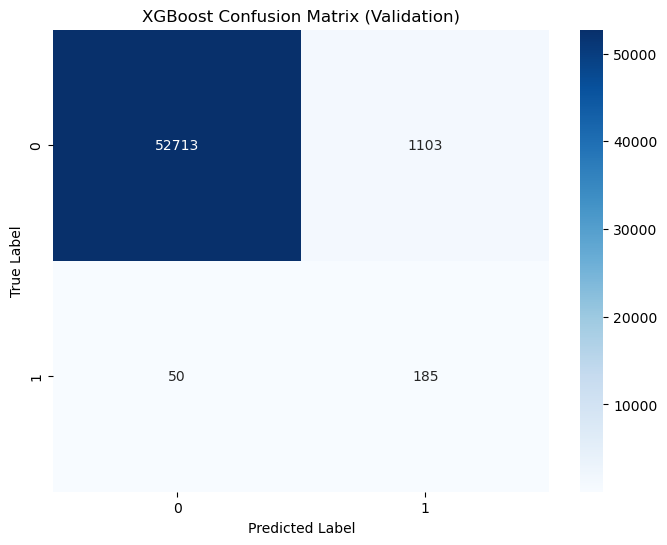


Optimal threshold for XGBoost: 0.696 (maximizing recall with ≥30% precision)
At this threshold - Precision: 0.302, Recall: 0.677, F1: 0.417


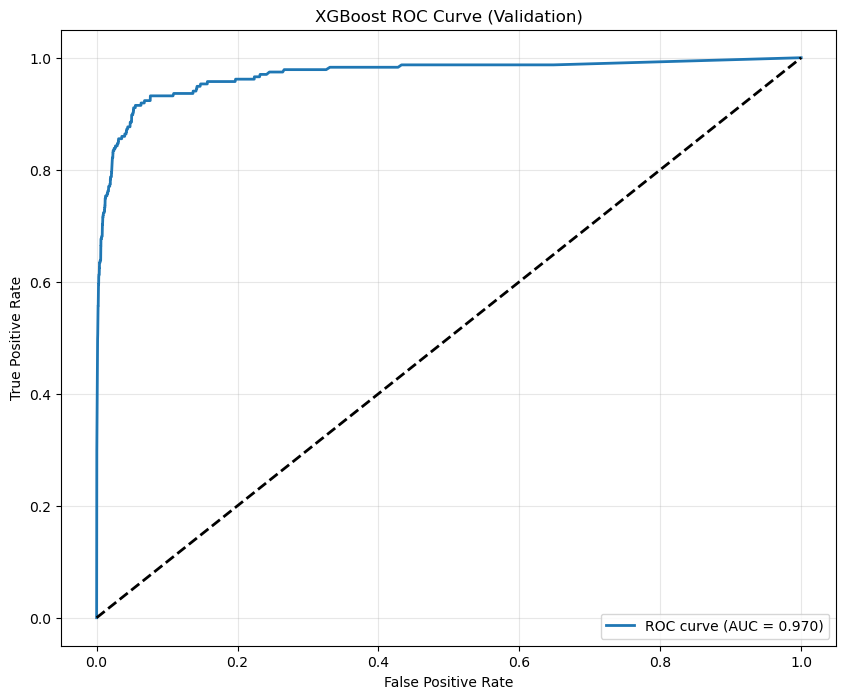

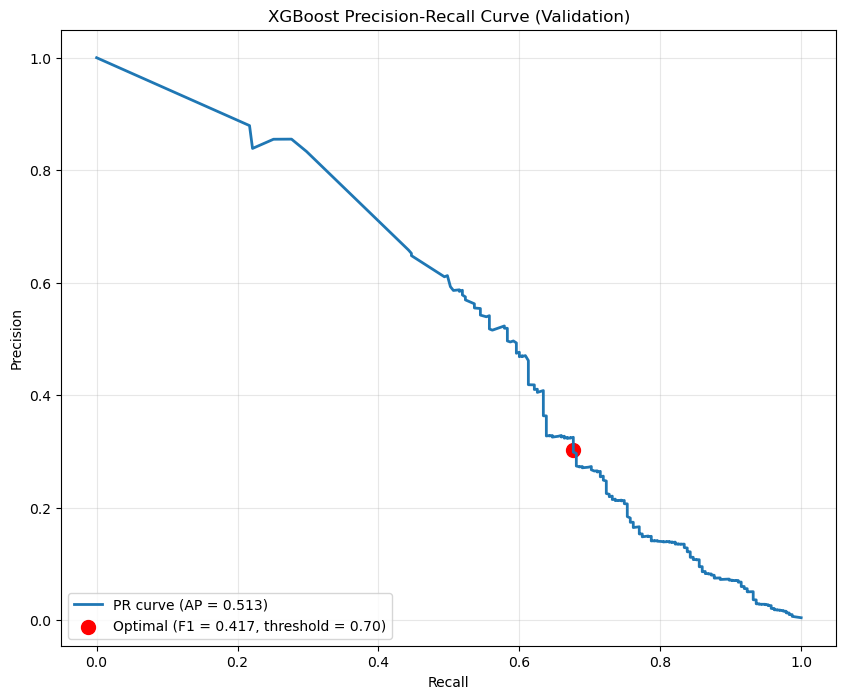

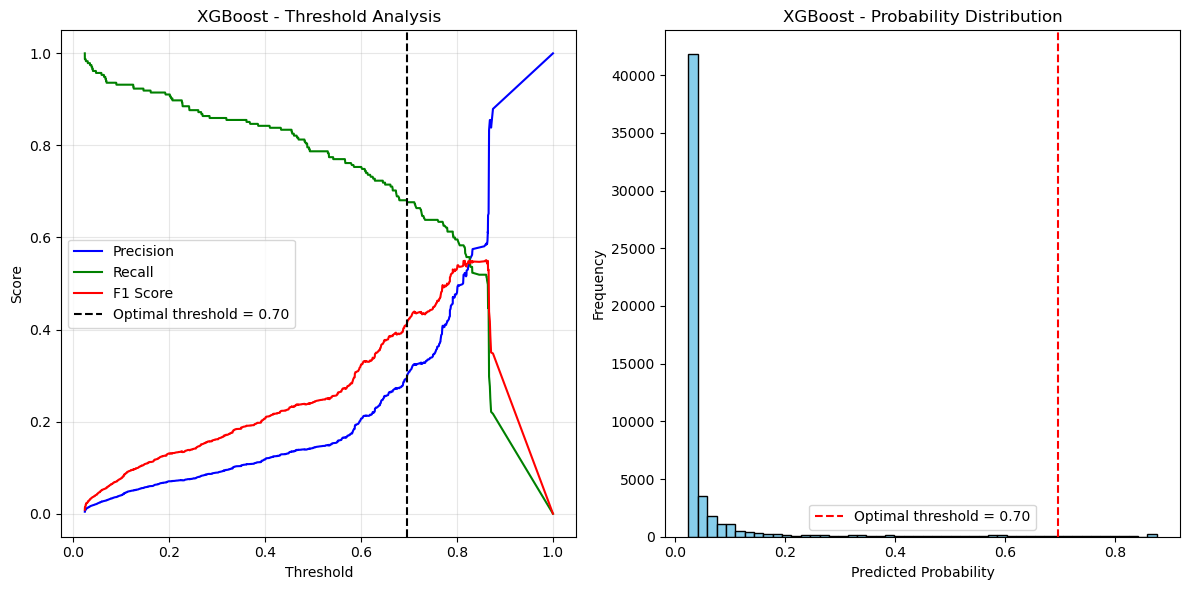


Test Set Results:
Default threshold - Precision: 0.155, Recall: 0.847, F1: 0.262
Optimal threshold - Precision: 0.292, Recall: 0.706, F1: 0.413
ROC AUC: 0.987
PR AUC: 0.502

Classification Report (Test Set, Optimal Threshold):
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     53816
         1.0       0.29      0.71      0.41       235

    accuracy                           0.99     54051
   macro avg       0.65      0.85      0.70     54051
weighted avg       1.00      0.99      0.99     54051



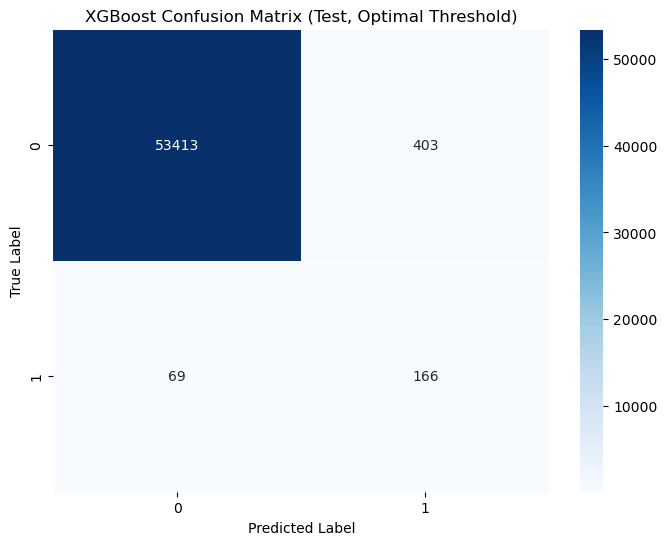

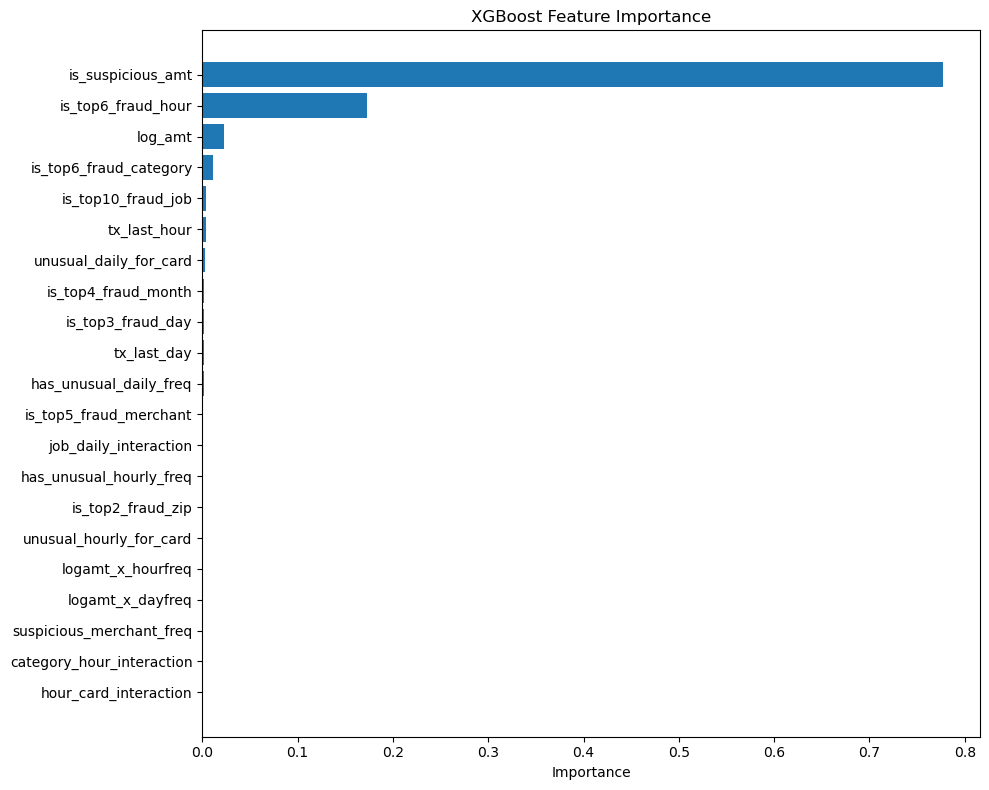


==== Grid Search and Training for Random Forest ====
Best hyperparameters for Random Forest: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validation F1 scores: [0.84046693 0.84251969 0.81909548 0.83522013 0.85095541]
Mean CV F1 score: 0.838

Validation set metrics (default threshold):
Precision: 0.082
Recall: 0.847
F1 Score: 0.149
ROC AUC: 0.970
PR AUC: 0.441

Classification Report (Validation Set):
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     53816
         1.0       0.08      0.85      0.15       235

    accuracy                           0.96     54051
   macro avg       0.54      0.90      0.56     54051
weighted avg       1.00      0.96      0.97     54051



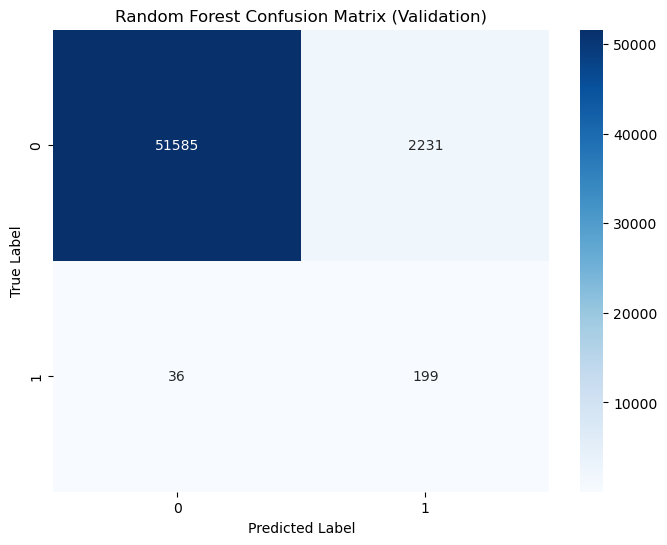


Optimal threshold for Random Forest: 0.927 (maximizing recall with ≥30% precision)
At this threshold - Precision: 0.300, Recall: 0.596, F1: 0.399


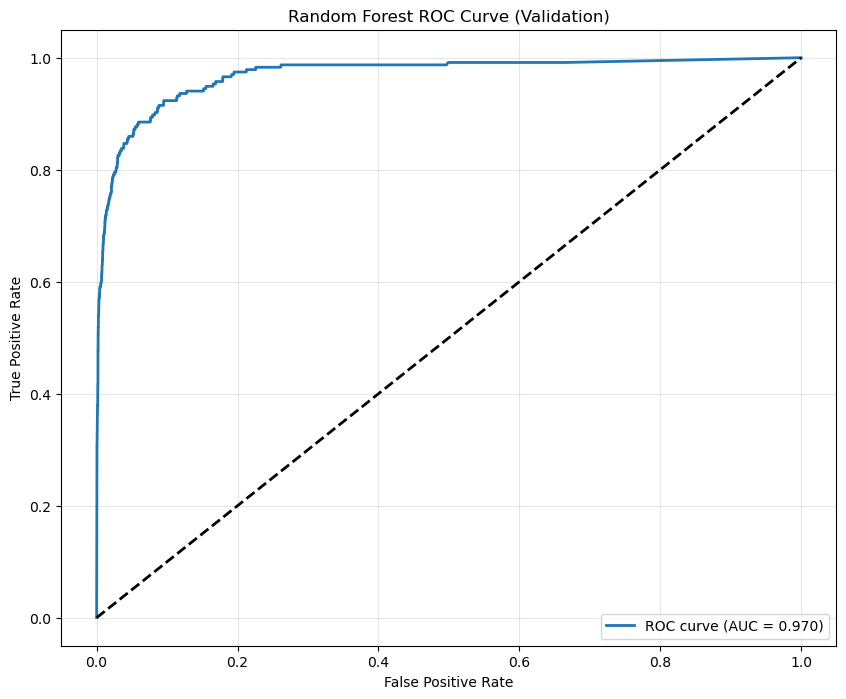

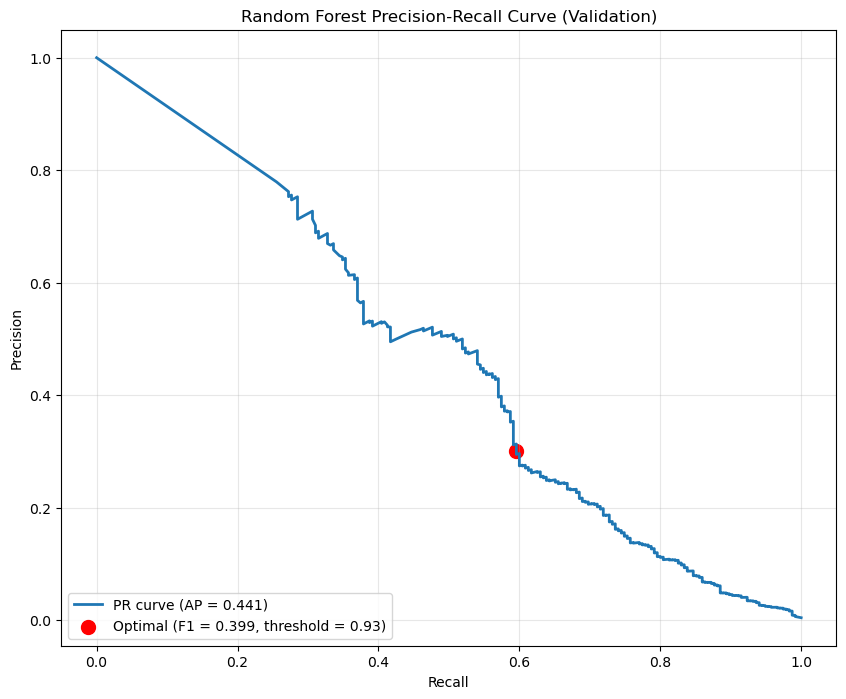

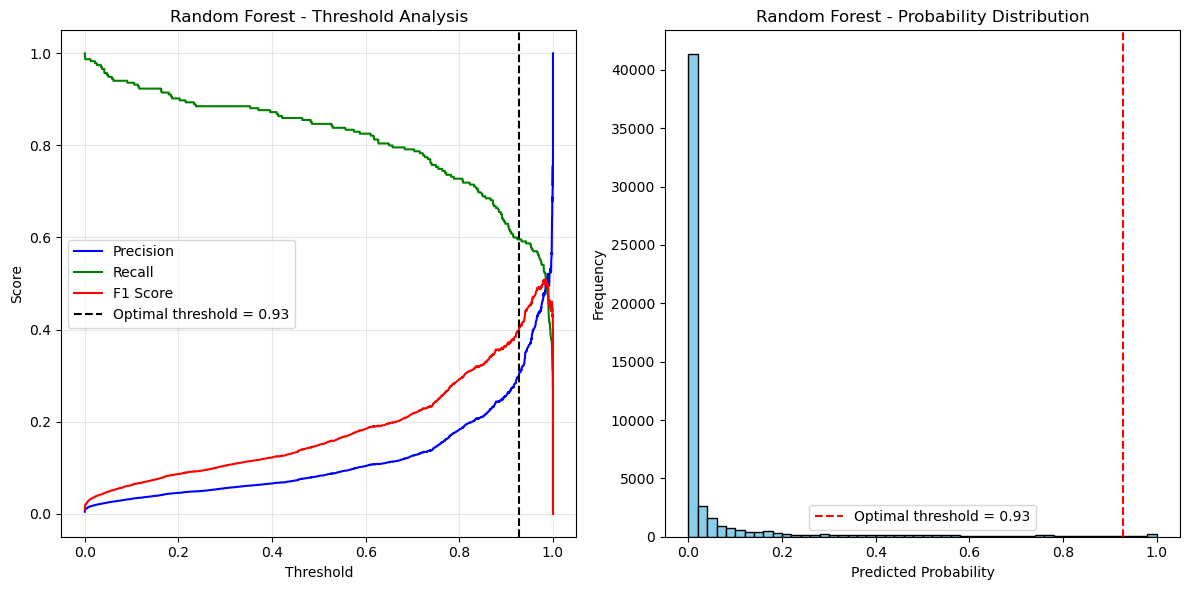


Test Set Results:
Default threshold - Precision: 0.085, Recall: 0.889, F1: 0.154
Optimal threshold - Precision: 0.310, Recall: 0.660, F1: 0.422
ROC AUC: 0.980
PR AUC: 0.489

Classification Report (Test Set, Optimal Threshold):
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     53816
         1.0       0.31      0.66      0.42       235

    accuracy                           0.99     54051
   macro avg       0.65      0.83      0.71     54051
weighted avg       1.00      0.99      0.99     54051



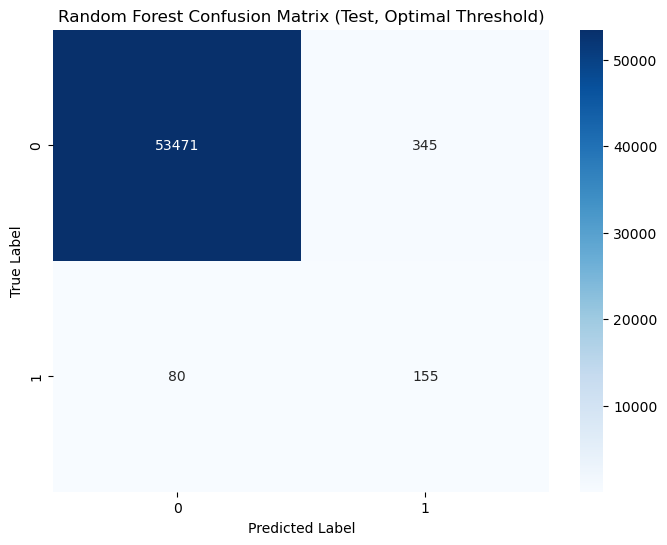

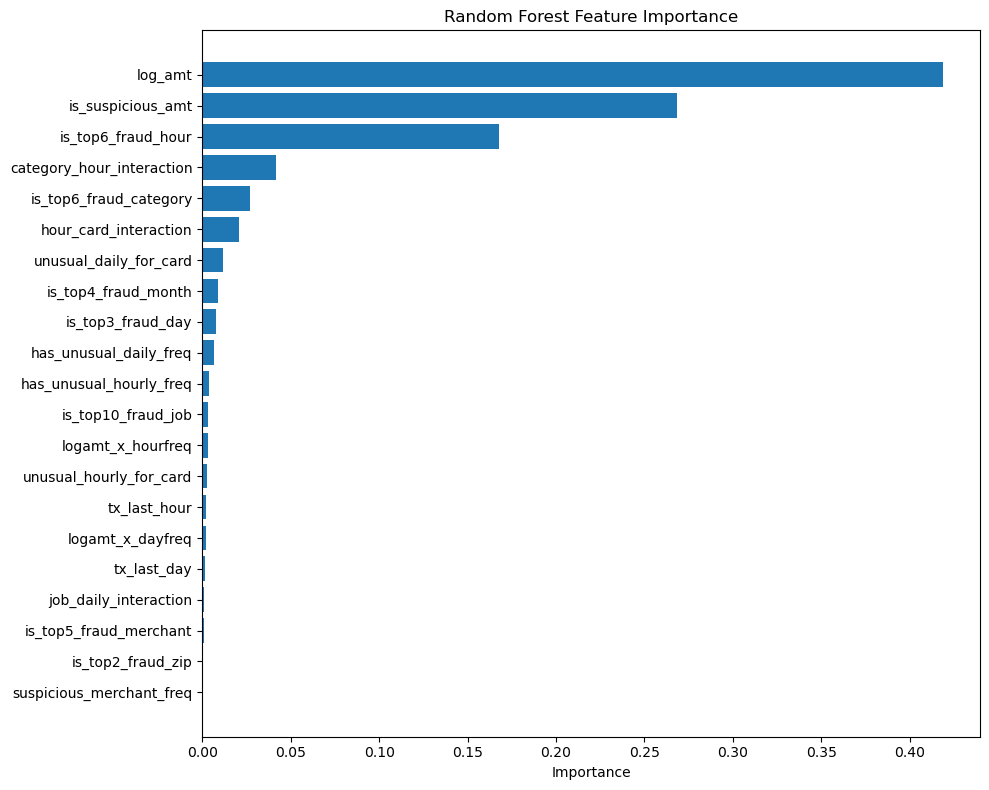


==== Grid Search and Training for Neural Network ====
Best hyperparameters for Neural Network: {'batch_size': 32, 'hidden_dim': 50, 'lr': 0.01, 'num_epochs': 10, 'num_hidden_layers': 1}
Cross-validation F1 scores: [0. 0. 0. 0. 0.]
Mean CV F1 score: 0.000

Validation set metrics (default threshold):
Precision: 0.079
Recall: 0.804
F1 Score: 0.144
ROC AUC: 0.967
PR AUC: 0.294

Classification Report (Validation Set):
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     53816
         1.0       0.08      0.80      0.14       235

    accuracy                           0.96     54051
   macro avg       0.54      0.88      0.56     54051
weighted avg       1.00      0.96      0.98     54051



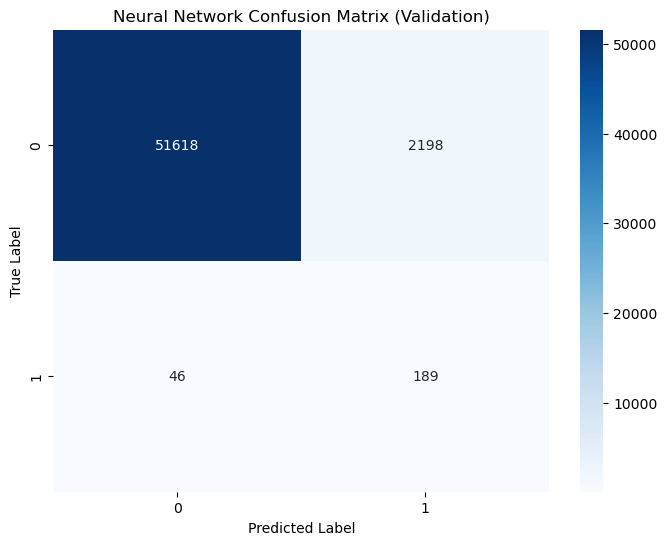


Optimal threshold for Neural Network: 0.984 (maximizing recall with ≥30% precision)
At this threshold - Precision: 0.300, Recall: 0.374, F1: 0.333


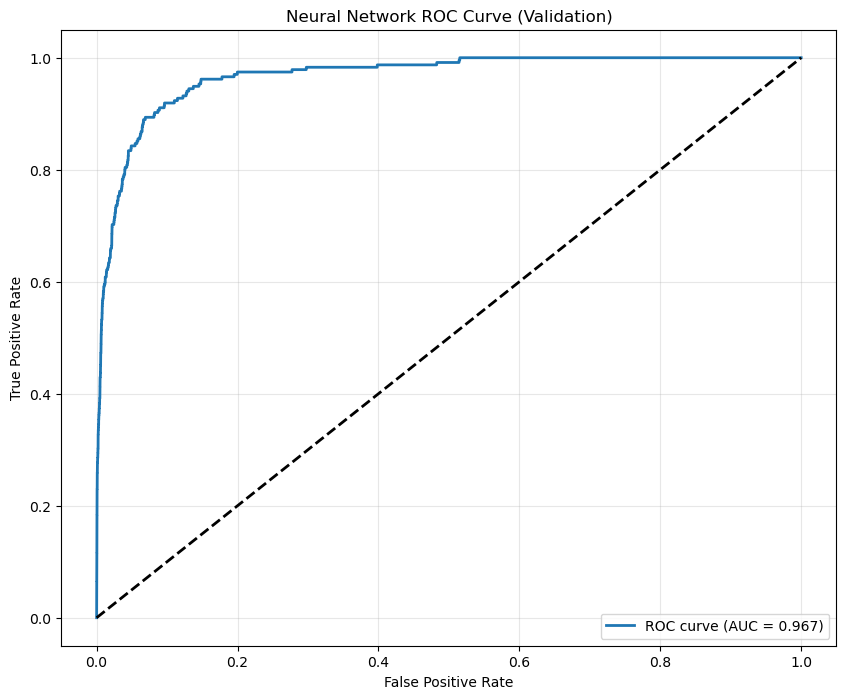

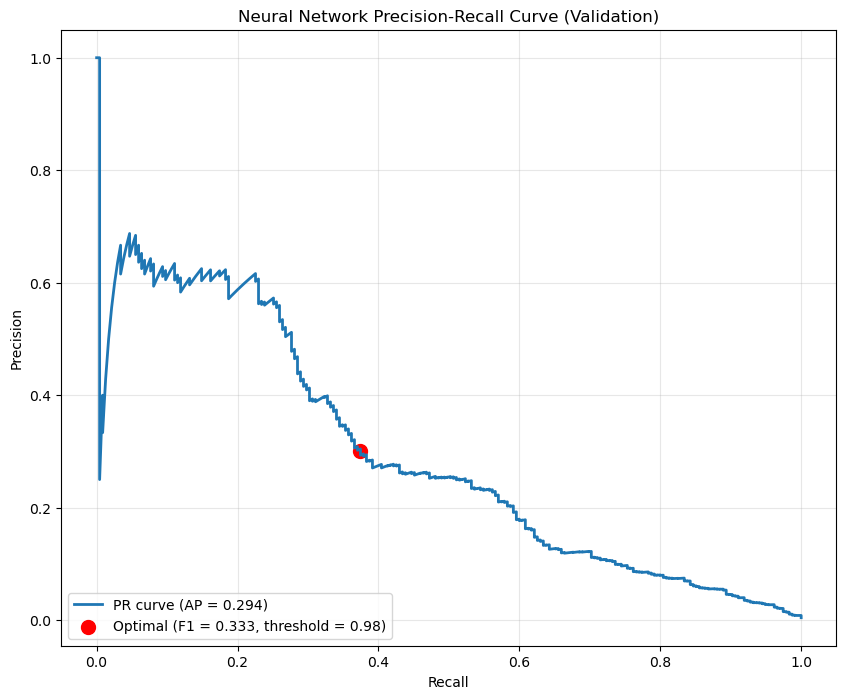

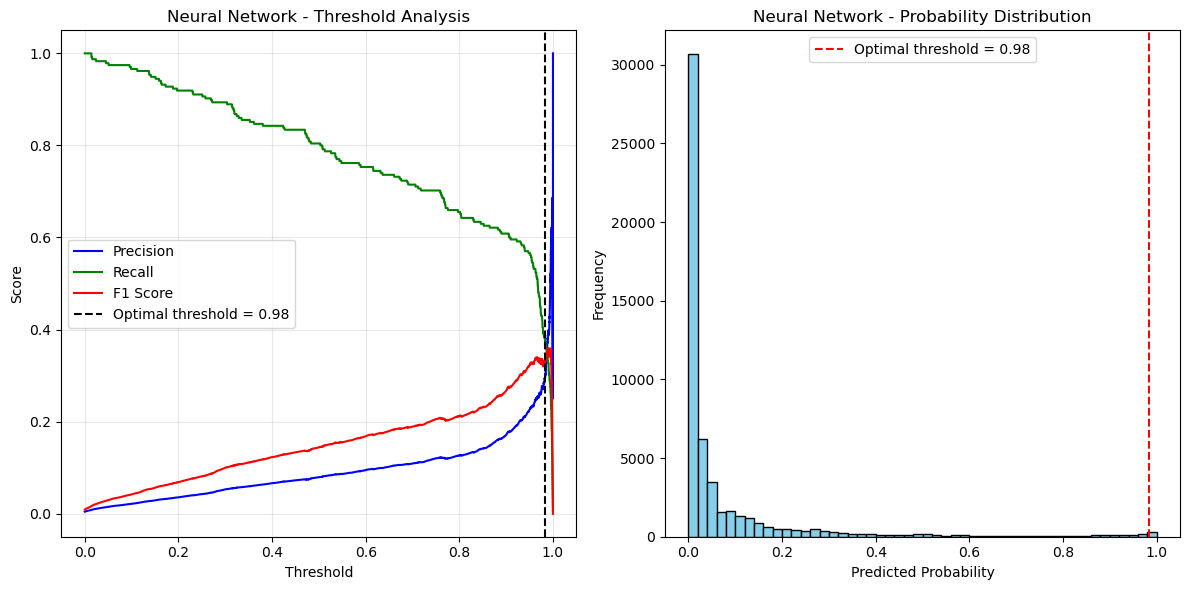


Test Set Results:
Default threshold - Precision: 0.078, Recall: 0.821, F1: 0.142
Optimal threshold - Precision: 0.331, Recall: 0.345, F1: 0.338
ROC AUC: 0.969
PR AUC: 0.274

Classification Report (Test Set, Optimal Threshold):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     53816
         1.0       0.33      0.34      0.34       235

    accuracy                           0.99     54051
   macro avg       0.66      0.67      0.67     54051
weighted avg       0.99      0.99      0.99     54051



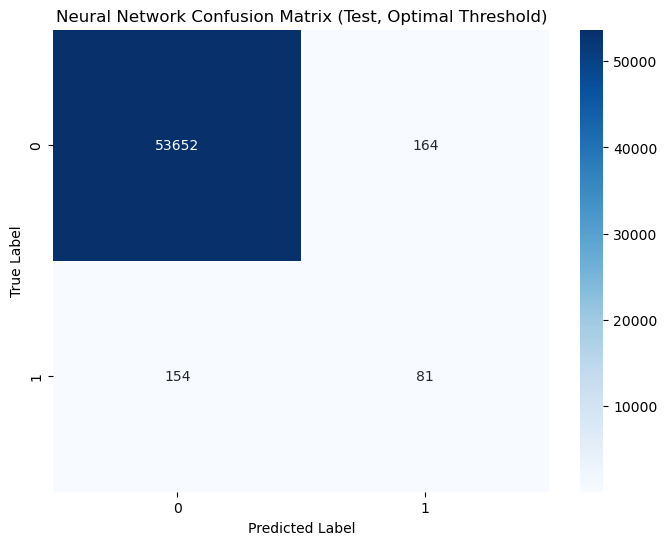

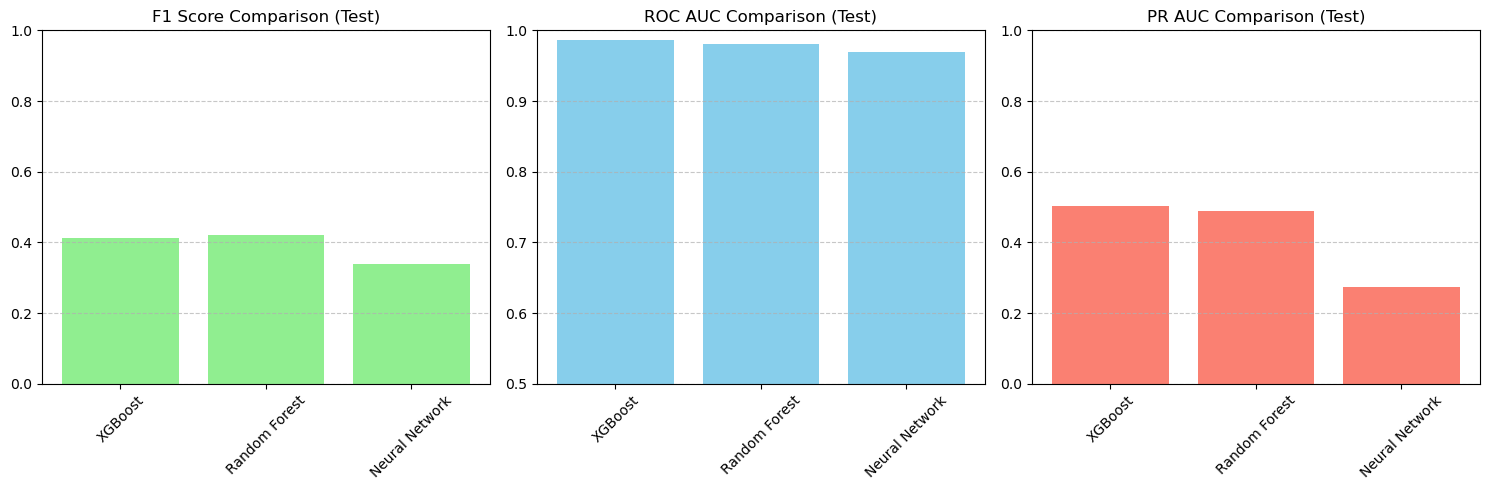


=== Summary ===
Best model: Random Forest
Best threshold: 0.927
Best F1 score on test set: 0.422

=== Best Model's Classification Report on Test Set ===
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     53816
         1.0       0.31      0.66      0.42       235

    accuracy                           0.99     54051
   macro avg       0.65      0.83      0.71     54051
weighted avg       1.00      0.99      0.99     54051



NameError: name 'model' is not defined

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# PyTorch and related imports
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, ClassifierMixin

# Sklearn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score, precision_score,
    recall_score, f1_score
)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
import xgboost as xgb

#############################################
# Define a PyTorch Neural Network Wrapper with Dropout and BatchNorm
#############################################
class TorchNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, hidden_dim=32, num_hidden_layers=1, lr=0.001, 
                 num_epochs=10, batch_size=64, dropout=0.5, random_state=42, verbose=0):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_hidden_layers = num_hidden_layers
        self.lr = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.dropout = dropout
        self.random_state = random_state
        self.verbose = verbose
        self._build_model()
    
    def _build_model(self):
        layers = []
        # First hidden layer: Linear -> BatchNorm -> ReLU -> Dropout
        layers.append(nn.Linear(self.input_dim, self.hidden_dim))
        layers.append(nn.BatchNorm1d(self.hidden_dim))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(p=self.dropout))
        # Additional hidden layers (if any)
        for _ in range(self.num_hidden_layers - 1):
            layers.append(nn.Linear(self.hidden_dim, self.hidden_dim))
            layers.append(nn.BatchNorm1d(self.hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=self.dropout))
        # Output layer
        layers.append(nn.Linear(self.hidden_dim, 1))
        self.model = nn.Sequential(*layers)
        self.criterion = nn.BCEWithLogitsLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
    
    def fit(self, X, y):
        # Ensure reproducibility
        torch.manual_seed(self.random_state)
        self._build_model()  # reinitialize model each time
        if isinstance(X, pd.DataFrame):
            X_tensor = torch.FloatTensor(X.values)
        else:
            X_tensor = torch.FloatTensor(X)
        if isinstance(y, pd.Series) or isinstance(y, pd.DataFrame):
            y_tensor = torch.FloatTensor(y.values).view(-1, 1)
        else:
            y_tensor = torch.FloatTensor(y).view(-1, 1)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        
        self.model.train()
        for epoch in range(self.num_epochs):
            for batch_X, batch_y in loader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()
            if self.verbose:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss.item():.4f}")
        return self
    
    def predict_proba(self, X):
        self.model.eval()
        if isinstance(X, pd.DataFrame):
            X_tensor = torch.FloatTensor(X.values)
        else:
            X_tensor = torch.FloatTensor(X)
        with torch.no_grad():
            outputs = self.model(X_tensor)
            probs = torch.sigmoid(outputs).numpy().flatten()
        # Return probability for class 0 and 1
        return np.vstack([1 - probs, probs]).T
    
    def predict(self, X):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= 0.5).astype(int)

#############################################
# Define the evaluation function with grid search
#############################################
def evaluate_fraud_models(X_train, X_val, X_test, y_train, y_val, y_test, 
                          X_train_resampled=None, y_train_resampled=None,
                          smote_ratio=None, verbose=True):
    """
    Train and evaluate fraud detection models (XGBoost, Random Forest, and a PyTorch Neural Network)
    using grid search for hyperparameter tuning and threshold optimization.
    
    Parameters:
    -----------
    X_train, X_val, X_test, y_train, y_val, y_test : training, validation, and test splits
    X_train_resampled, y_train_resampled : optional SMOTE-resampled training data
    smote_ratio : the SMOTE ratio used (for tracking in results)
    verbose : whether to print detailed output and display plots
    
    Returns:
    --------
    Dictionary containing model performance metrics and results.
    """
    # Determine whether to use resampled data
    if X_train_resampled is not None and y_train_resampled is not None:
        X_train_use = X_train_resampled
        y_train_use = y_train_resampled
        print(f"Using SMOTE-resampled training data (ratio: {smote_ratio})")
    else:
        X_train_use = X_train
        y_train_use = y_train
        print("Using original training data (no SMOTE)")
    
    # Define default hyperparameter grids
    xgb_param_grid = {
        'n_estimators': [100, 150, 200, 300, 400],
        'max_depth': [10, 15, 20], 25, 30, 50, 100]
        'learning_rate': [0.1]
    }
    
    rf_param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 15, 20, 30],
        'min_samples_split': [2, 3, 5, 7, 10, 12]
    }
    
    nn_param_grid = {
        'hidden_dim': [40, 50, 60, 70100],
        'num_hidden_layers': [1],
        'lr': [0.1],
        'num_epochs': [10, 15],
        'batch_size': [32]
    }
    
    # Print hyperparameter grids
    print("\nDefault hyperparameter grids for grid search:")
    print("XGBoost:", xgb_param_grid)
    print("Random Forest:", rf_param_grid)
    print("Neural Network:", nn_param_grid)
    
    # Initialize models – note that for the NN we must supply input_dim from X_train
    models = {
        'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Neural Network': TorchNNClassifier(input_dim=X_train.shape[1], random_state=42, verbose=0)
    }
    
    # Map each model to its corresponding hyperparameter grid
    param_grids = {
        'XGBoost': xgb_param_grid,
        'Random Forest': rf_param_grid,
        'Neural Network': nn_param_grid
    }
    
    # Dictionary to store results
    results = {
        'smote_ratio': smote_ratio,
        'models': {},
        'best_model': None,
        'best_threshold': None,
        'best_f1': 0,
        'thresholds': {}
    }
    
    # For each model, run grid search and evaluate
    for name, model in models.items():
        print(f"\n==== Grid Search and Training for {name} ====")
        grid = GridSearchCV(estimator=model, param_grid=param_grids[name],
                            scoring='f1', cv=5, n_jobs=-1, verbose=0)
        grid.fit(X_train_use, y_train_use)
        best_model = grid.best_estimator_
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        
        # Cross validation on training data (using the best estimator)
        cv_scores = cross_val_score(best_model, X_train_use, y_train_use, cv=5, scoring='f1')
        print(f"Cross-validation F1 scores: {cv_scores}")
        print(f"Mean CV F1 score: {cv_scores.mean():.3f}")
        
        # Predict on validation set
        y_val_pred = best_model.predict(X_val)
        y_val_prob = best_model.predict_proba(X_val)[:, 1]
        
        # Calculate metrics on validation set
        val_precision = precision_score(y_val, y_val_pred)
        val_recall = recall_score(y_val, y_val_pred)
        val_f1 = f1_score(y_val, y_val_pred)
        val_auc = roc_auc_score(y_val, y_val_prob)
        val_avg_precision = average_precision_score(y_val, y_val_prob)
        
        print(f"\nValidation set metrics (default threshold):")
        print(f"Precision: {val_precision:.3f}")
        print(f"Recall: {val_recall:.3f}")
        print(f"F1 Score: {val_f1:.3f}")
        print(f"ROC AUC: {val_auc:.3f}")
        print(f"PR AUC: {val_avg_precision:.3f}")
        
        if verbose:
            print("\nClassification Report (Validation Set):")
            print(classification_report(y_val, y_val_pred))
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_val, y_val_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'{name} Confusion Matrix (Validation)')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.show()
        
        # For the evaluate_fraud_models function in the document:


        
        # With this new optimization code:
        # Threshold optimization on validation set using precision-recall curve
        precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_prob)
        thresholds = np.append(thresholds, 1.0)
        f1_scores = []
        for i in range(len(thresholds)):
            if precisions[i] + recalls[i] > 0:
                f1_temp = 2 * (precisions[i] * recalls[i]) / (precisions[i] + recalls[i])
            else:
                f1_temp = 0
            f1_scores.append(f1_temp)
        
        # Find indices where precision is at least 30%
        min_precision = 0.30  # 30% precision requirement
        valid_indices = np.where(precisions >= min_precision)[0]
        
        if len(valid_indices) > 0:
            # Find the threshold that maximizes recall while maintaining at least 30% precision
            best_recall_idx = valid_indices[np.argmax(recalls[valid_indices])]
            best_threshold = thresholds[best_recall_idx]
            best_precision = precisions[best_recall_idx]
            best_recall = recalls[best_recall_idx]
            best_f1 = f1_scores[best_recall_idx]
            
            print(f"\nOptimal threshold for {name}: {best_threshold:.3f} (maximizing recall with ≥30% precision)")
            print(f"At this threshold - Precision: {best_precision:.3f}, Recall: {best_recall:.3f}, F1: {best_f1:.3f}")
        else:
            # Fallback to original F1 optimization if no threshold meets precision requirement
            best_idx = np.argmax(f1_scores)
            best_threshold = thresholds[best_idx]
            best_precision = precisions[best_idx]
            best_recall = recalls[best_idx]
            best_f1 = f1_scores[best_idx]
            
            print(f"\nOptimal threshold for {name}: {best_threshold:.3f} (maximizing F1, no point met ≥30% precision requirement)")
            print(f"At this threshold - Precision: {best_precision:.3f}, Recall: {best_recall:.3f}, F1: {best_f1:.3f}")
        
        if verbose:
            # Plot ROC curve
            plt.figure(figsize=(10, 8))
            fpr, tpr, _ = roc_curve(y_val, y_val_prob)
            plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {val_auc:.3f})')
            plt.plot([0, 1], [0, 1], 'k--', lw=2)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{name} ROC Curve (Validation)')
            plt.legend(loc='lower right')
            plt.grid(True, alpha=0.3)
            plt.show()
            
            # Plot Precision-Recall curve
            plt.figure(figsize=(10, 8))
            plt.plot(recalls, precisions, lw=2, label=f'PR curve (AP = {val_avg_precision:.3f})')
            plt.scatter(best_recall, best_precision, color='red', s=100, 
                        label=f'Optimal (F1 = {best_f1:.3f}, threshold = {best_threshold:.2f})')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(f'{name} Precision-Recall Curve (Validation)')
            plt.legend(loc='lower left')
            plt.grid(True, alpha=0.3)
            plt.show()
            
            # Plot threshold analysis
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.plot(thresholds, precisions, 'b-', label='Precision')
            plt.plot(thresholds, recalls, 'g-', label='Recall')
            plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
            plt.axvline(x=best_threshold, color='k', linestyle='--', 
                        label=f'Optimal threshold = {best_threshold:.2f}')
            plt.xlabel('Threshold')
            plt.ylabel('Score')
            plt.title(f'{name} - Threshold Analysis')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            plt.subplot(1, 2, 2)
            plt.hist(y_val_prob, bins=50, color='skyblue', edgecolor='black')
            plt.axvline(x=best_threshold, color='r', linestyle='--', 
                        label=f'Optimal threshold = {best_threshold:.2f}')
            plt.xlabel('Predicted Probability')
            plt.ylabel('Frequency')
            plt.title(f'{name} - Probability Distribution')
            plt.legend()
            plt.tight_layout()
            plt.show()
        
        # Evaluate on test set
        y_test_prob = best_model.predict_proba(X_test)[:, 1]
        y_test_pred_default = best_model.predict(X_test)
        y_test_pred_optimal = (y_test_prob >= best_threshold).astype(int)
        
        test_default_precision = precision_score(y_test, y_test_pred_default)
        test_default_recall = recall_score(y_test, y_test_pred_default)
        test_default_f1 = f1_score(y_test, y_test_pred_default)
        
        test_optimal_precision = precision_score(y_test, y_test_pred_optimal)
        test_optimal_recall = recall_score(y_test, y_test_pred_optimal)
        test_optimal_f1 = f1_score(y_test, y_test_pred_optimal)
        
        test_auc = roc_auc_score(y_test, y_test_prob)
        test_avg_precision = average_precision_score(y_test, y_test_prob)
        
        print("\nTest Set Results:")
        print(f"Default threshold - Precision: {test_default_precision:.3f}, Recall: {test_default_recall:.3f}, F1: {test_default_f1:.3f}")
        print(f"Optimal threshold - Precision: {test_optimal_precision:.3f}, Recall: {test_optimal_recall:.3f}, F1: {test_optimal_f1:.3f}")
        print(f"ROC AUC: {test_auc:.3f}")
        print(f"PR AUC: {test_avg_precision:.3f}")
        
        if verbose:
            print("\nClassification Report (Test Set, Optimal Threshold):")
            print(classification_report(y_test, y_test_pred_optimal))
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_test, y_test_pred_optimal)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'{name} Confusion Matrix (Test, Optimal Threshold)')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.show()
            
            if hasattr(best_model, 'feature_importances_'):
                plt.figure(figsize=(10, 8))
                importances = best_model.feature_importances_
                sorted_idx = np.argsort(importances)
                plt.barh(range(len(sorted_idx)), importances[sorted_idx])
                plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
                plt.xlabel('Importance')
                plt.title(f'{name} Feature Importance')
                plt.tight_layout()
                plt.show()
        
        # Store results for the current model
        results['models'][name] = {
            'model': best_model,
            'best_params': grid.best_params_,
            'optimal_threshold': best_threshold,
            'validation': {
                'precision': val_precision,
                'recall': val_recall,
                'f1': val_f1,
                'roc_auc': val_auc,
                'pr_auc': val_avg_precision
            },
            'test_default': {
                'precision': test_default_precision,
                'recall': test_default_recall,
                'f1': test_default_f1
            },
            'test_optimal': {
                'precision': test_optimal_precision,
                'recall': test_optimal_recall,
                'f1': test_optimal_f1,
                'roc_auc': test_auc,
                'pr_auc': test_avg_precision
            },
            'thresholds': {
                'values': thresholds,
                'precisions': precisions,
                'recalls': recalls,
                'f1_scores': f1_scores
            }
        }
        
        # Update best model based on optimal test F1 score
        if test_optimal_f1 > results['best_f1']:
            results['best_model'] = name
            results['best_threshold'] = best_threshold
            results['best_f1'] = test_optimal_f1
    
    # Compare model performance across all evaluated models
    if verbose:
        model_names = list(results['models'].keys())
        test_f1_scores = [results['models'][m]['test_optimal']['f1'] for m in model_names]
        test_roc_scores = [results['models'][m]['test_optimal']['roc_auc'] for m in model_names]
        test_pr_scores = [results['models'][m]['test_optimal']['pr_auc'] for m in model_names]
        
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.bar(model_names, test_f1_scores, color='lightgreen')
        plt.title('F1 Score Comparison (Test)')
        plt.ylim(0, 1.0)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.subplot(1, 3, 2)
        plt.bar(model_names, test_roc_scores, color='skyblue')
        plt.title('ROC AUC Comparison (Test)')
        plt.ylim(0.5, 1.0)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.subplot(1, 3, 3)
        plt.bar(model_names, test_pr_scores, color='salmon')
        plt.title('PR AUC Comparison (Test)')
        plt.ylim(0, 1.0)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.show()
    
    print(f"\n=== Summary ===")
    print(f"Best model: {results['best_model']}")
    print(f"Best threshold: {results['best_threshold']:.3f}")
    print(f"Best F1 score on test set: {results['best_f1']:.3f}")
    
    # Print the classification report for the best model on the test set
    print("\n=== Best Model's Classification Report on Test Set ===")
    best_model_obj = results['models'][results['best_model']]['model']
    best_threshold = results['best_threshold']
    y_test_prob_best = best_model_obj.predict_proba(X_test)[:, 1]
    y_test_pred_best = (y_test_prob_best >= best_threshold).astype(int)
    print(classification_report(y_test, y_test_pred_best))
    
    return results

#############################################
# (Optional) Function to compare SMOTE ratios
#############################################
def compare_smote_ratios(all_results):
    """
    Compare model performance across different SMOTE ratios.
    
    Parameters:
    -----------
    all_results : Dictionary mapping SMOTE ratios to their evaluation results.
    """
    ratios = sorted(all_results.keys())
    best_f1_scores = [all_results[r]['best_f1'] for r in ratios]
    best_models = [all_results[r]['best_model'] for r in ratios]
    
    plt.figure(figsize=(10, 6))
    plt.plot(ratios, best_f1_scores, 'o-', color='blue', markersize=8)
    for i, model in enumerate(best_models):
        plt.annotate(model, (ratios[i], best_f1_scores[i]), 
                     textcoords="offset points", xytext=(0,10), ha='center')
    plt.grid(True, alpha=0.3)
    plt.xlabel('SMOTE Ratio')
    plt.ylabel('Best F1 Score (Test)')
    plt.title('Effect of SMOTE Ratio on Best Model Performance')
    if len(ratios) > 1:
        z = np.polyfit(ratios, best_f1_scores, 1)
        p = np.poly1d(z)
        plt.plot(ratios, p(ratios), "r--", alpha=0.7, label=f"Trend: y={z[0]:.4f}x+{z[1]:.4f}")
        plt.legend()
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for ratio in ratios:
        res = all_results[ratio]
        best_model_name = res['best_model']
        m_res = res['models'][best_model_name]
        recalls = m_res['thresholds']['recalls']
        precisions = m_res['thresholds']['precisions']
        pr_auc = m_res['test_optimal']['pr_auc']
        plt.plot(recalls, precisions, lw=2, 
                 label=f"Ratio {ratio} - {best_model_name} (AP = {pr_auc:.3f})")
    if 'baseline_fraud_rate' in all_results:
        plt.axhline(y=all_results['baseline_fraud_rate'], color='r', linestyle='--', 
                  label=f'Baseline (fraud rate = {all_results["baseline_fraud_rate"]:.3f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for Best Models at Different SMOTE Ratios')
    plt.legend(loc='lower left')
    plt.grid(True, alpha=0.3)
    plt.show()

#############################################
# Example usage:
# Assuming you have already prepared your data splits:
# X_train, X_val, X_test, y_train, y_val, y_test
# And optionally, X_train_resampled, y_train_resampled from SMOTE.
#############################################
# For instance:
# X_train, X_val, X_test, y_train, y_val, y_test, X_train_resampled, y_train_resampled = prepare_data(final_df, ...)

model_results = evaluate_fraud_models(
    X_train, X_val, X_test, 
    y_train, y_val, y_test,
    X_train_resampled, y_train_resampled,
    smote_ratio=0  # Adjust as needed
)

# If evaluating different SMOTE ratios, you can store results like this:
all_results = {}
all_results[1.0] = model_results
# e.g., for another ratio:
# model_results_0_5 = evaluate_fraud_models(..., smote_ratio=0.5)
# all_results[0.5] = model_results_0_5
# all_results['baseline_fraud_rate'] = y_test.mean()  # baseline for reference
# compare_smote_ratios(all_results)

